In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #https://github.com/ResidentMario/missingno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Visualiser le maximum possible d'information
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# CSV

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv',
                        sep=',', header=0, encoding='utf-8')
geolocation = pd.read_csv('olist_geolocation_dataset.csv',
                          sep=',', header=0, encoding='utf-8')
order_items = pd.read_csv('olist_order_items_dataset.csv',
                          sep=',', header=0, encoding='utf-8')
order_payments = pd.read_csv('olist_order_payments_dataset.csv',
                             sep=',', header=0, encoding='utf-8')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv',
                            sep=',', header=0, encoding='utf-8')
orders = pd.read_csv('olist_orders_dataset.csv',
                     sep=',', header=0, encoding='utf-8')
products = pd.read_csv('olist_products_dataset.csv',
                       sep=',', header=0, encoding='utf-8')
sellers = pd.read_csv('olist_sellers_dataset.csv',
                      sep=',', header=0, encoding='utf-8')
translation = pd.read_csv('product_category_name_translation.csv',
                          sep=',', header=0, encoding='utf-8')

In [4]:
df_list = [
    customers, 
    geolocation, 
    order_items,
    order_payments, 
    order_reviews, 
    orders, 
    products, 
    sellers, 
    translation, 
          ]

df_names = [ 
    'customers', 
    'geolocation', 
    'order_items',
    'order_payments', 
    'order_reviews', 
    'orders', 
    'products', 
    'sellers', 
    'translation',
]

#### Data Schema

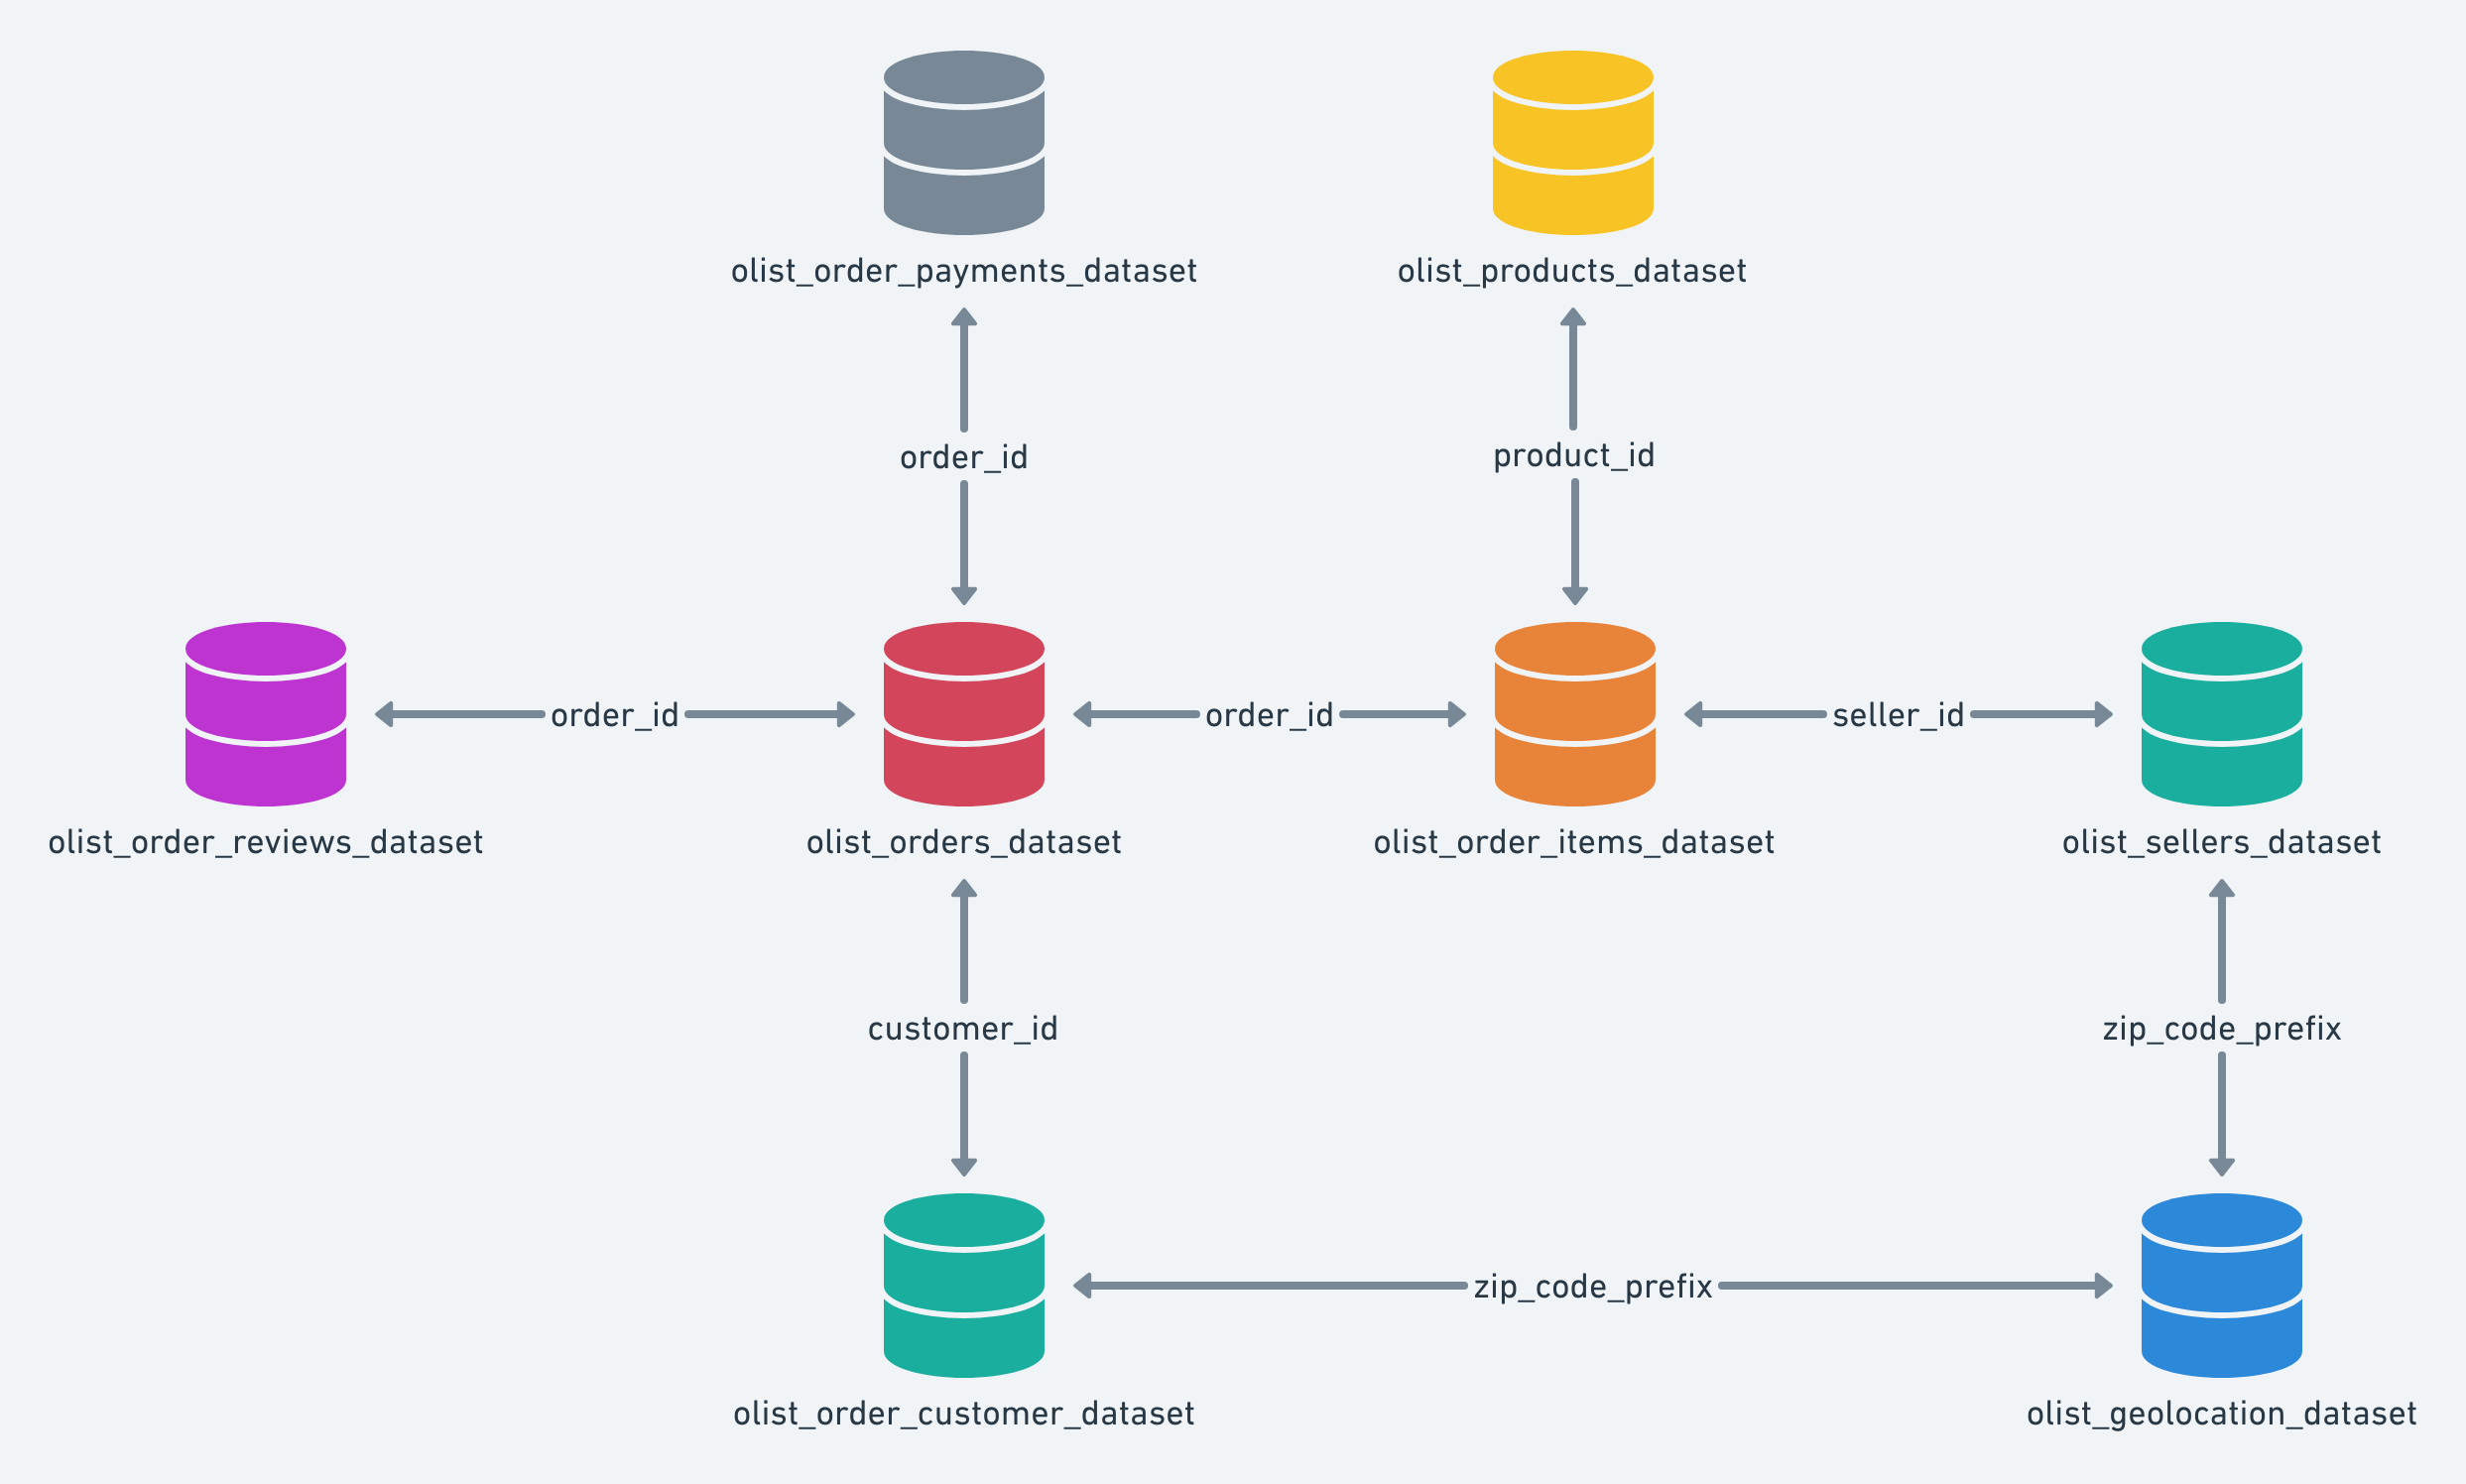

In [5]:
from IPython import display
display.Image('data_schema.png', retina=True)

# Exploration

**Customers**

>This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

>At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

In [6]:
customers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Geolocation**

In [7]:
geolocation.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**order_items**

In [8]:
order_items.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**order_payments**

In [9]:
order_payments.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**order_reviews**

In [10]:
order_reviews.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Orders**

In [11]:
orders.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Products**

In [12]:
products.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Sellers**

In [13]:
sellers.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Translation**

In [14]:
translation.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Shapes

In [15]:
for df, name in zip(df_list, df_names):
    print(name, ':', df.shape)

customers : (99441, 5)
geolocation : (1000163, 5)
order_items : (112650, 7)
order_payments : (103886, 5)
order_reviews : (100000, 7)
orders : (99441, 8)
products : (32951, 9)
sellers : (3095, 4)
translation : (71, 2)


## NaN?

In [16]:
for df, name in zip(df_list, df_names):
    if(df.isna().sum().sum() > 0):
        print(name, ':', '{:.2f}'.format(df.isna().sum().sum()/df.shape[0]/df.shape[1]), '%')

order_reviews : 0.21 %
orders : 0.01 %
products : 0.01 %


Distribution des NaN

**order_reviews**

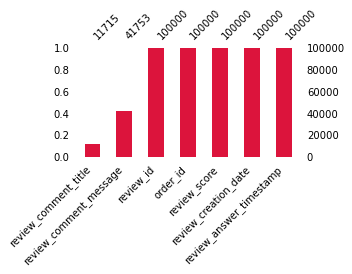

In [17]:
msno.bar(order_reviews, figsize=(4,2), fontsize=10, color='crimson', inline=True, sort='ascending')

In [18]:
order_reviews['review_comment_title'].fillna('no_title', inplace=True)
order_reviews['review_comment_message'].fillna('no_message', inplace=True)

**orders**

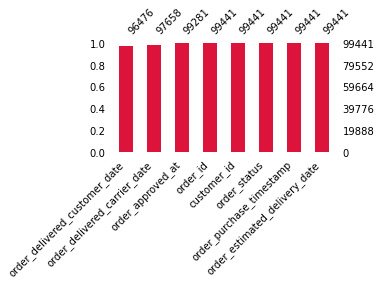

In [19]:
msno.bar(orders, figsize=(4,2), fontsize=10, color='crimson', inline=True, sort='ascending')

In [20]:
orders.order_status.value_counts().to_frame()

,order_status
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [21]:
orders[(orders['order_approved_at'].isnull() == True) | 
       (orders['order_delivered_carrier_date'].isnull() == True) | 
       (orders['order_delivered_customer_date'].isnull() == True)].sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
10814,04770bff63a120fbf0eea1f62b84f8f0,830ed363f26a7624bd458c1931d348ea,unavailable,2017-02-01 21:07:12,2017-02-01 21:15:18,NaN,NaN,2017-03-10 00:00:00
1582,d815bd2c2bdd79e4c0e0263caa986d66,04d7d73089b39d83f81b829cbd98e43d,processing,2017-03-15 10:30:17,2017-03-15 10:30:17,NaN,NaN,2017-04-13 00:00:00
37459,a2dd87f10cd0b3cdb73c6ba52e333250,21c0c4d41202817c20b246e5a5070ac4,unavailable,2017-10-11 18:51:26,2017-10-14 03:49:24,NaN,NaN,2017-11-07 00:00:00


In [22]:
orders['order_delivered_customer_date'].fillna(1, inplace=True)
orders['order_delivered_carrier_date'].fillna(1, inplace=True)
orders['order_approved_at'].fillna(1, inplace=True)

**products**

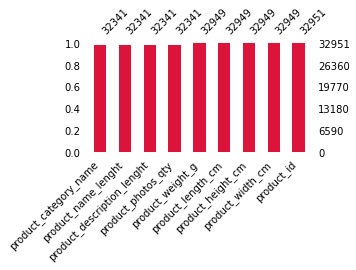

In [23]:
msno.bar(products, figsize=(4,2), fontsize=10, color='crimson', inline=True, sort='ascending')

In [24]:
products[products['product_category_name'].isnull() == True].sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21176,5a5d7d4e7f23de210890506c818d2b8a,NaN,NaN,NaN,NaN,800.0,48.0,40.0,11.0
11866,2b29170916b7bbc58fd9078f0f4e7234,NaN,NaN,NaN,NaN,300.0,50.0,4.0,40.0
27321,97077aaf1edef55f3c90f91075f92261,NaN,NaN,NaN,NaN,350.0,25.0,15.0,30.0


Il y a des produits pour lesquels il manque des détails, principalement le *product_category_name*

In [25]:
products['product_category_name'].fillna('no_name', inplace=True)
products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)
products['product_weight_g'].fillna(0, inplace=True)
products['product_length_cm'].fillna(0, inplace=True)
products['product_height_cm'].fillna(0, inplace=True)
products['product_width_cm'].fillna(0, inplace=True)

## Doublons

In [26]:
for df, name in zip(df_list, df_names):
    if(df.duplicated().sum() > 0):
        print(name, ':', df.duplicated().sum())

geolocation : 261831


In [27]:
geolocation.drop_duplicates(inplace=True)

## Types

In [28]:
df_resume = pd.DataFrame({})

for df, name in zip(df_list, df_names):
    for col in df.columns:
        df_resume = df_resume.append(
            pd.DataFrame({
                'df_name':[name],
                'col_name':[col],
                'col_type':[df[col].dtype],
                'unique_values':[df[col].nunique()]}),
            ignore_index=True)

df_resume        

,df_name,col_name,col_type,unique_values
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocation,geolocation_zip_code_prefix,int64,19015
6,geolocation,geolocation_lat,float64,717360
7,geolocation,geolocation_lng,float64,717613
8,geolocation,geolocation_city,object,8011
9,geolocation,geolocation_state,object,27


### Premières pistes

- customers
    - Pourquoi il y a deux colonnes différents *customer_id* et *customer_unique_id* ?
    - Catégoriser *customer_city* et *customer_state*

- geolocation
    - *geolocation_city* > *customer_city*. Pourquoi ?
    - Catégoriser *geolocation_city* et *geolocation_state*
    - Faire une carte avec les clients ?

- order_items
    - 21 types de *order_item_id* ?
    - *order_items* < *order_id* des dataframes **order_reviews**, **order_payments** et **orders**

- order_payments
    - *order_id* a une élément moins que dans les dataframes **order_reviews** et **orders**
    - Categoriser *payment_sequential* et *payment_type*

- order_reviews
    - *order_id* a la même quantité que dans le dataframe **orders**

- orders
    - Voir **Générale** au-desus

- products
    - Catégoriser *product_category_name*
    
- sellers
    - Catégoriser *seller_city* et *seller_state*
    
- translation
    - *product_category_name* dans **products** a 73 éléments uniques mais dans **translation** a 71. Donc il manquént 2 traductions

**Générale** : changer les colonnes contenant des dates à format date.

# Nettoyage

### Datetime

>Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT.

In [29]:
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date, errors='coerce')

order_reviews.review_creation_date = pd.to_datetime(order_reviews.review_creation_date, errors='coerce')
order_reviews.review_answer_timestamp= pd.to_datetime(order_reviews.review_answer_timestamp, errors='coerce')

orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp, errors='coerce')
orders.order_approved_at = pd.to_datetime(orders.order_approved_at, errors='coerce')
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date, errors='coerce')
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date, errors='coerce')
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date, errors='coerce')

### Catégories

In [30]:
set(products.product_category_name) - set(translation.product_category_name)

{'no_name', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [31]:
t_len = len(translation)

translation.loc[t_len,'product_category_name'] = np.nan
translation.loc[t_len,'product_category_name_english'] = np.nan

translation.loc[t_len+1,'product_category_name'] = 'pc_gamer'
translation.loc[t_len+1,'product_category_name_english'] = 'pc_gamer'

translation.loc[t_len+2,'product_category_name'] = 'portateis_cozinha_e_preparadores_de_alimentos'
translation.loc[t_len+2,'product_category_name_english'] = 'small_appliances_kitchen_and_food_processors'

In [32]:
set(products.product_category_name) - set(translation.product_category_name)

{'no_name'}

**Regroupement des catégories**

Distributions des produits par catégorie

<AxesSubplot:>

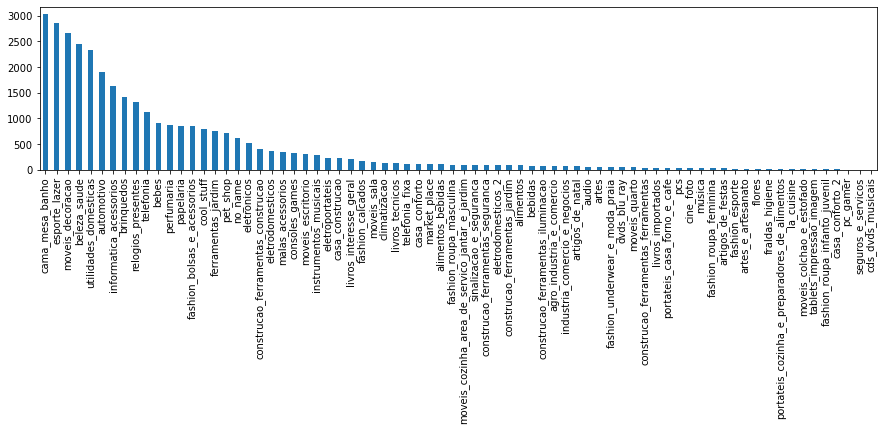

In [33]:
products['product_category_name'].value_counts().plot.bar(figsize=(15,3))

In [34]:
categories = {
    #appliances
    'utilidades_domesticas':'appliances',
    'eletroportateis':'appliances',
    'climatizacao':'appliances',
    'moveis_cozinha_area_de_servico_jantar_e_jardim':'appliances',
    'eletrodomesticos':'appliances',
    'eletrodomesticos_2':'appliances',
    'portateis_casa_forno_e_cafe':'appliances',
    'portateis_cozinha_e_preparadores_de_alimentos':'appliances',

    #beauty
    'beleza_saude':'beauty',
    'perfumaria':'beauty',
    'fraldas_higiene':'beauty',
    
    #culture
    'brinquedos':'culture',
    'livros_tecnicos':'culture',
    'instrumentos_musicais':'culture',
    'artes':'culture',
    'livros_interesse_geral':'culture',
    'livros_importados':'culture',
    'cine_foto':'culture',
    'musica':'culture',
    'cds_dvds_musicais':'culture',
    'dvds_blu_ray':'culture',
    'artes_e_artesanato':'culture',

    #fashion
    'bebes':'fashion',
    'fashion_bolsas_e_acessorios':'fashion',
    'fashion_calcados':'fashion',
    'malas_acessorios':'fashion',
    'fashion_roupa_masculina':'fashion',
    'fashion_underwear_e_moda_praia':'fashion',
    'fashion_roupa_feminina':'fashion',
    'fashion_roupa_infanto_juvenil':'fashion',
    'relogios_presentes':'fashion',

    #food
    'alimentos_bebidas':'food',
    'alimentos':'food',
    'bebidas':'food',
    
    #garden
    'ferramentas_jardim':'garden',
    'pet_shop':'garden',
    'flores':'garden',
    
    #home
    'moveis_decoracao':'home',
    'cama_mesa_banho':'home',
    'casa_conforto':'home',
    'moveis_colchao_e_estofado':'home',
    'moveis_sala':'home',
    'moveis_quarto':'home',
    'la_cuisine':'home',
    'casa_conforto_2':'home',
    'artigos_de_festas':'home',
    'artigos_de_natal':'home',

    #office
    'papelaria':'office',
    'moveis_escritorio':'office',

    #other
    'automotivo':'other',
    'cool_stuff':'other',
    'NaN':'other',
    
    #services
    'market_place':'services',
    'agro_industria_e_comercio':'services',
    'industria_comercio_e_negocios':'services',
    'seguros_e_servicos':'services',

    #sports
    'esporte_lazer':'sports',
    'fashion_esporte':'sports',

    #tech
    'informatica_acessorios':'tech',
    'telefonia':'tech',
    'tablets_impressao_imagem':'tech',
    'telefonia_fixa':'tech',
    'consoles_games':'tech',
    'audio':'tech',
    'eletronicos':'tech',
    'sinalizacao_e_seguranca':'tech',
    'pcs':'tech',
    'pc_gamer':'tech',
    
    #tools
    'construcao_ferramentas_construcao':'tools',
    'construcao_ferramentas_jardim':'tools',
    'construcao_ferramentas_ferramentas':'tools',
    'casa_construcao':'tools',
    'construcao_ferramentas_iluminacao':'tools',
    'construcao_ferramentas_seguranca':'tools',
    
    #no_name
    'no_name':'no_name'
}

In [35]:
products['product_new_category_name'] = products['product_category_name'].astype('object')
products['product_new_category_name'] = products['product_new_category_name'].replace(categories, regex=False)
#products['product_new_category_name'] = products['product_new_category_name'].astype('category')

Nouvelle distribution des catégories

<AxesSubplot:>

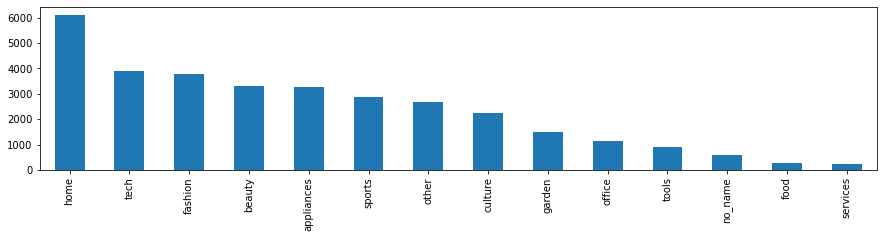

In [36]:
products['product_new_category_name'].value_counts().plot.bar(figsize=(15,3))

## Outliers

### Geolocation & Customers & Sellers

Est-ce qu'il y a des erreurs dans la Latitude et la Longitude ?

In [37]:
geolocation.shape

(738332, 5)

In [38]:
geolocation[['geolocation_lat', 'geolocation_lng']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,geolocation_lat,geolocation_lng
count,738332.00000,738332.00000
mean,-20.99835,-46.46110
std,5.89231,4.39371
min,-36.60537,-101.46677
25%,-23.60306,-48.86782
50%,-22.87359,-46.64728
75%,-19.92334,-43.83697
max,45.06593,121.10539


Avec https://en.wikipedia.org/wiki/List_of_extreme_points_of_Brazil comme source, on efface les coordonnées aberrants.

In [39]:
#Brazils most Northern spot is at 5° 15′ 5″ N latitude
geolocation = geolocation[geolocation.geolocation_lat <= 5.251389]

#it’s most Eastern spot is 28° 50′ 26″ W Long.
geolocation = geolocation[geolocation.geolocation_lng <=  -28.840556]

#it’s most Southern spot is at 33° 45′ 9″ S Latitude
geolocation = geolocation[geolocation.geolocation_lat >= -33.7525]

#it’s most Western spot is at 73° 59′ 4″ W Long.
geolocation = geolocation[geolocation.geolocation_lng >= -73.984444]

In [40]:
geolocation.shape

(738305, 5)

Correction des noms des villes.

In [41]:
#http://cep.la/baixar
#http://cep.la/CEP-dados-2018-latin1.zip
#TXT converted into CSV. The last 2 columns were deleted before import

municipios = pd.read_csv('ceps-latin1.csv', sep=';', header=None, encoding="utf-8", 
                         names=['zip_code', 'cidade', 'bairro']
                        )

split = municipios['cidade'].str.split('/', n=1, expand=True)
municipios['cidade'] = split[0]
municipios['estado'] = split[1]

split = municipios['estado'].str.split(' - ', n=1, expand=True)
municipios['estado'] = split[0].str.strip()
municipios['estado_comp'] = split[1]

municipios.drop(['bairro', 'estado_comp'], axis=1, inplace=True)

municipios['zip_code'] = municipios['zip_code'].astype('str').str[:-3].astype(np.int64)
municipios['cidade'] = municipios['cidade'].str.lower()

municipios.drop_duplicates(inplace=True)

municipios_dict = pd.Series(municipios.cidade.values, 
                            index=municipios.zip_code).to_dict()

In [42]:
geolocation['geolocation_city'] = geolocation['geolocation_zip_code_prefix'].map(municipios_dict)
customers['customer_city'] = customers['customer_zip_code_prefix'].map(municipios_dict)
sellers['seller_city'] = sellers['seller_zip_code_prefix'].map(municipios_dict)

In [43]:
print('Number of zip codes in Geolocation but not in Municipios:', 
      len(set(geolocation['geolocation_zip_code_prefix']) - set(municipios['zip_code'])))
print('Number of cities in Geolocation but not in Municipios:', 
      len(set(geolocation['geolocation_city']) - set(municipios['cidade'])))
print('Number of states in Geolocation but not in Municipios:', 
      len(set(geolocation['geolocation_state']) - set(municipios['estado'])))

print('')

print('Number of zip codes in Customers but not in Municipios:', 
      len(set(customers['customer_zip_code_prefix']) - set(municipios['zip_code'])))
print('Number of cities in Customers but not in Municipios:', 
      len(set(customers['customer_city']) - set(municipios['cidade'])))
print('Number of states in Customers but not in Municipios:', 
      len(set(customers['customer_state']) - set(municipios['estado'])))

print('')

print('Number of zip codes in Sellers but not in Municipios:', 
      len(set(sellers['seller_zip_code_prefix']) - set(municipios['zip_code'])))
print('Number of cities in Sellers but not in Municipios:', 
      len(set(sellers['seller_city']) - set(municipios['cidade'])))
print('Number of states in Sellers but not in Municipios:', 
      len(set(sellers['seller_state']) - set(municipios['estado'])))

Number of zip codes in Geolocation but not in Municipios: 1203
Number of cities in Geolocation but not in Municipios: 1
Number of states in Geolocation but not in Municipios: 0

Number of zip codes in Customers but not in Municipios: 749
Number of cities in Customers but not in Municipios: 1
Number of states in Customers but not in Municipios: 0

Number of zip codes in Sellers but not in Municipios: 84
Number of cities in Sellers but not in Municipios: 1
Number of states in Sellers but not in Municipios: 0


In [44]:
print('Cities whose is not in Municipios:')
print('Geolocation')
nan_geo_cities = geolocation[~geolocation['geolocation_zip_code_prefix'].
                             isin(municipios['zip_code'])]['geolocation_city']
print(nan_geo_cities.unique(), len(nan_geo_cities))

print('')

print('Customers')
nan_cus_cities = customers[~customers['customer_zip_code_prefix'].
                           isin(municipios['zip_code'])]['customer_city']
print(nan_cus_cities.unique(), len(nan_cus_cities))

print('')

print('Sellers')
nan_sel_cities = sellers[~sellers['seller_zip_code_prefix'].
                         isin(municipios['zip_code'])]['seller_city']
print(nan_sel_cities.unique(), len(nan_sel_cities))

Cities whose is not in Municipios:
Geolocation
[nan] 30079

Customers
[nan] 4391

Sellers
[nan] 99


On efface toutes les lignes contenant NaN dans la colonne df_city

In [45]:
geolocation_wo = geolocation.dropna().reset_index(drop=True)
customers_wo = customers.dropna().reset_index(drop=True)
sellers_wo = sellers.dropna().reset_index(drop=True)

In [46]:
print('geolocation_wo', ':', geolocation_wo.duplicated().sum())
print('customers_wo', ':', customers_wo.duplicated().sum())
print('sellers_wo', ':', sellers_wo.duplicated().sum())

geolocation_wo : 17802
customers_wo : 0
sellers_wo : 0


In [47]:
geolocation_wo.drop_duplicates(inplace=True)
geolocation_wo.shape

(690424, 5)

In [48]:
print('Number of zip codes in Geolocation but not in Municipios:', 
      len(set(geolocation_wo['geolocation_zip_code_prefix']) - set(municipios['zip_code'])))
print('Number of cities in Geolocation but not in Municipios:', 
      len(set(geolocation_wo['geolocation_city']) - set(municipios['cidade'])))
print('Number of states in Geolocation but not in Municipios:', 
      len(set(geolocation_wo['geolocation_state']) - set(municipios['estado'])))

print('')

print('Number of zip codes in Customers but not in Municipios:', 
      len(set(customers_wo['customer_zip_code_prefix']) - set(municipios['zip_code'])))
print('Number of cities in Customers but not in Municipios:', 
      len(set(customers_wo['customer_city']) - set(municipios['cidade'])))
print('Number of states in Customers but not in Municipios:', 
      len(set(customers_wo['customer_state']) - set(municipios['estado'])))

print('')

print('Number of zip codes in Sellers but not in Municipios:', 
      len(set(sellers_wo['seller_zip_code_prefix']) - set(municipios['zip_code'])))
print('Number of cities in Sellers but not in Municipios:', 
      len(set(sellers_wo['seller_city']) - set(municipios['cidade'])))
print('Number of states in Sellers but not in Municipios:', 
      len(set(sellers_wo['seller_state']) - set(municipios['estado'])))

Number of zip codes in Geolocation but not in Municipios: 0
Number of cities in Geolocation but not in Municipios: 0
Number of states in Geolocation but not in Municipios: 0

Number of zip codes in Customers but not in Municipios: 0
Number of cities in Customers but not in Municipios: 0
Number of states in Customers but not in Municipios: 0

Number of zip codes in Sellers but not in Municipios: 0
Number of cities in Sellers but not in Municipios: 0
Number of states in Sellers but not in Municipios: 0


### Products

In [49]:
products.max()

product_id                    fffe9eeff12fcbd74a2f2b007dde0c58
product_category_name         utilidades_domesticas           
product_name_lenght           76.0                            
product_description_lenght    3992.0                          
product_photos_qty            20.0                            
product_weight_g              40425.0                         
product_length_cm             105.0                           
product_height_cm             105.0                           
product_width_cm              118.0                           
product_new_category_name     tools                           
dtype: object

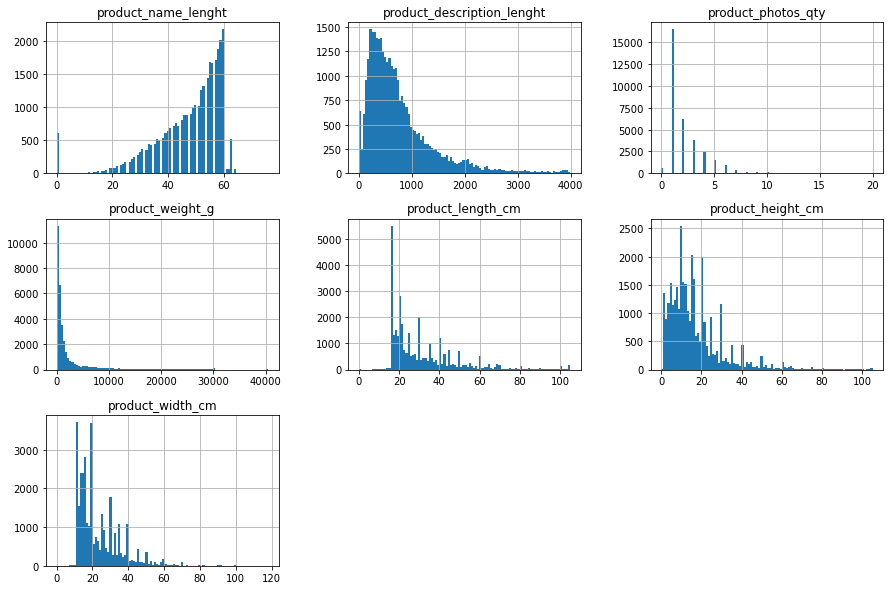

In [50]:
num_cols = products.select_dtypes(include=['int64', 'float64']).columns.tolist()
graphs = products[num_cols].hist(bins=100, figsize=(15,10))

In [51]:
products[products['product_weight_g'] == products.max()[5]]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_new_category_name
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,home


Considérant le poids de 40425g, pourquoi peut-on se demander si cela peut être une valeur valide. Supposons sa forme carrée, le produit a un volume de 13cm * 65cm * 28cm = 23660cm^3. Avec ce volume et ce poids, nous pouvons calculer sa densité en divisant la masse par le volume. Donc, 40425g / 23660cm^3 = 1.70858 g/cm^3

Techniquement parlant, une densité de 1.7 g/cm^3 est la densité du magnésium. D'une manière plus «mortelle» de parler, 1.7 est entre la densité du sang et du granit, donc, encore une fois, ce n'est pas si farfelu comme valeur.

### order_items

**price**
>item price

**freight_value**
>item freight value item (if an order has more than one item the freight value is splitted between items)

**order_item_id**
>sequential number identifying number of items included in the same order.

Nous considérons comme axiomatique que la colonne order_item_id ne contienne pas de valeurs aberrantes.

In [52]:
order_items.max()

order_id               fffe41c64501cc87c801fd61db3f6244
order_item_id          21                              
product_id             fffe9eeff12fcbd74a2f2b007dde0c58
seller_id              ffff564a4f9085cd26170f4732393726
shipping_limit_date    2020-04-09 22:35:08             
price                  6735.0                          
freight_value          409.68                          
dtype: object

In [53]:
order_items.min()

order_id               00010242fe8c5a6d1ba2dd792cb16214
order_item_id          1                               
product_id             00066f42aeeb9f3007548bb9d3f33c38
seller_id              0015a82c2db000af6aaaf3ae2ecb0532
shipping_limit_date    2016-09-19 00:15:34             
price                  0.85                            
freight_value          0.0                             
dtype: object

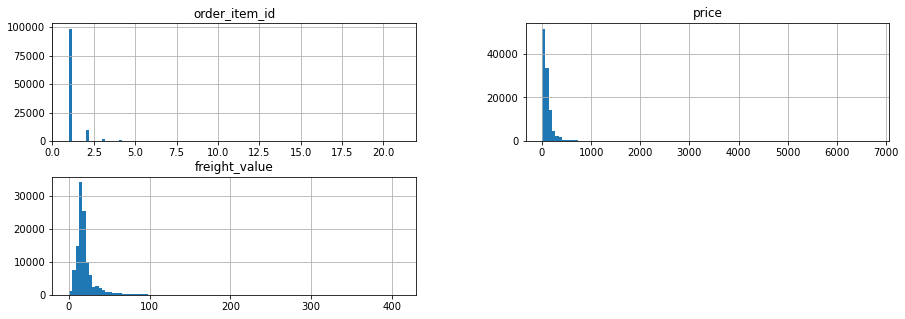

In [54]:
num_cols = order_items.select_dtypes(include=['int64', 'float64']).columns.tolist()
graphs = order_items[num_cols].hist(bins=100, figsize=(15,5))

La colonne order_item_id contient l'ajout séquentiel des produits dans chaque commande. Par exemple, une commande contenant 2 produits: un ciseau et une règle serait :

| order_id | product_id | order_item_id |
| --- | --- | --- |
| 1 | ciseau | 1 |
| 1 | règle | 2 |

Maintenant, si le même ordre contient 2 ciseaux et 3 règles, ce serait comme suit:

| order_id | product_id | order_item_id |
| --- | --- | --- |
| 1 | ciseau | 1 |
| 1 | ciseau | 2 |
| 1 | règle | 3 |
| 1 | règle | 4 |
| 1 | règle | 5 |

Pas très utile pour connaître le montant exact de chaque produit par commande car la colonne order_item_id peut être assez trompeuse.

Par conséquent, nous allons créer un nouveau dataframe contenant une colonne avec la quantitée réelle de chaque produit par commande et non leur valeur séquentielle dans le panier.

In [55]:
q_prod_order = order_items.groupby(['order_id', 'product_id']).size().reset_index(name='q_prod_order')
order_items_wo = pd.merge(q_prod_order, order_items, 
                          on=['order_id', 'product_id'], 
                          how='left').drop('order_item_id', axis=1).drop_duplicates().reset_index(drop=True)

print(order_items.shape)
print(order_items_wo.shape)

(112650, 7)
(102425, 7)


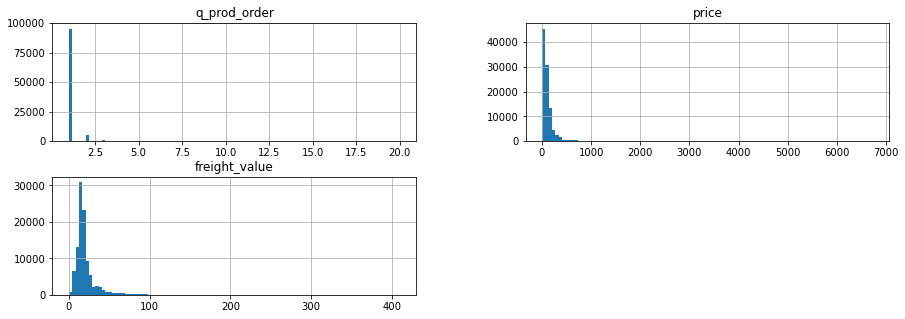

In [56]:
num_cols = order_items_wo.select_dtypes(include=['int64', 'float64']).columns.tolist()
graphs = order_items_wo[num_cols].hist(bins=100, figsize=(15,5))

In [57]:
order_tot_items = order_items.copy().drop(['product_id', 'order_item_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], axis=1)
order_tot_items['q_total'] = order_tot_items['order_id'].map(order_tot_items['order_id'].value_counts())
order_tot_items = order_tot_items.drop_duplicates('order_id').reset_index(drop=True)

In [58]:
order_tot_items.shape

(98666, 2)

### order_payments

**payment_sequential**
>a customer may pay an order with more than one payment method. If he does so, a sequence will be created to

**payment_installments**
>number of installments chosen by the customer

In [59]:
order_payments.max()

order_id                fffe41c64501cc87c801fd61db3f6244
payment_sequential      29                              
payment_type            voucher                         
payment_installments    24                              
payment_value           13664.08                        
dtype: object

In [60]:
order_payments.min()

order_id                00010242fe8c5a6d1ba2dd792cb16214
payment_sequential      1                               
payment_type            boleto                          
payment_installments    0                               
payment_value           0.0                             
dtype: object

In [61]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
print('Max payment:', '{:.2f}'.format(c.convert(order_payments.max()[4], 'BRL', 'EUR')), '€')

Max payment: 2092.44 €


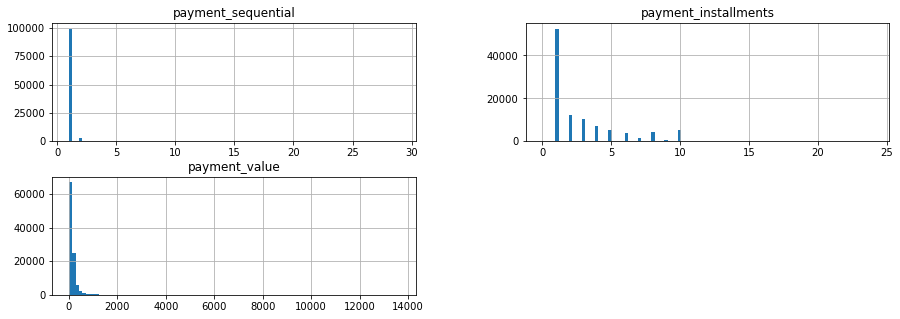

In [62]:
num_cols = order_payments.select_dtypes(include=['int64', 'float64']).columns.tolist()
graphs = order_payments[num_cols].hist(bins=100, figsize=(15,5))

In [63]:
order_payments[order_payments['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


En soi, 24 versements, ce n'est pas une valeur aberrante puisque les cartes de crédit ont une portée plus profonde dans la société brésilienne qu'en France.

Même pour le payment de 13664.1 R$ qu'en soi il y a rien d'aberrante.

Au contraire, 0 versements est une valeur aberrante car ils sont liés à des valeurs de paiement (payment_value) normaux. Donc les lignes seront supprimées.

Pour la valeur de paiement (payment_value) 0, il est possible que l'utilisateur dispose d'un bon pour un article gratuit et comme la documentation ne spécifie pas cette possibilité, nous supposons son existence, par conséquent, une valeur de paiement de 0 ne sera pas considérée comme une valeur aberrante.

Lors de la vérification de certains échantillons de payment_sequential, nous n'avons trouvé aucun indicateur de valeurs aberrantes; par conséquent, nous supposons que la colonne ne contient pas de valeurs aberrantes

In [64]:
order_payments_wo = order_payments.drop(order_payments[order_payments['payment_installments'] == 0].index)
order_payments_wo.reset_index(drop=True, inplace=True)

### order_reviews

In [65]:
order_reviews[order_reviews['order_id'].duplicated(keep=False)].sort_values('order_id', ascending=False)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
92957,870d856a4873d3a67252b0c51d79b950,ffaabba06c9d293a3c614e0515ddbabc,3,no_title,no_message,2017-12-20 00:00:00,2017-12-20 18:50:16
54388,5476dd0eaee7c4e2725cafb011aa758c,ffaabba06c9d293a3c614e0515ddbabc,3,no_title,no_message,2017-12-20 00:00:00,2017-12-21 13:24:55
41665,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,no_title,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55
18916,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,no_title,"Envio rapido, produto conforme descrito no anuncio.",2017-08-22 00:00:00,2017-08-25 11:40:22
95246,c56a88a404315a0d9e412c1472dda2c4,ff763b73e473d03c321bcd5a053316e8,5,no_title,no_message,2017-11-01 00:00:00,2017-11-01 19:55:52
27663,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,no_title,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48
9972,117b4a19af2b247561f0075f73d6eea1,fe041ba1c9f54016432fa6ee91709dbc,5,no_title,no_message,2017-12-20 00:00:00,2017-12-20 22:04:37
42497,9da0796858da97acd8b67578388a3241,fe041ba1c9f54016432fa6ee91709dbc,5,no_title,"O cartucho está estourado (vazando), já contatei a empresa. Foi-me informado que haverá a troca!",2017-12-20 00:00:00,2017-12-20 22:03:18
81277,c509f8b367ee5227700c29fcc76a097a,fd95ae805c63c534f1a64589e102225e,5,no_title,"Recebi dentro do prazo estabelecido, produtos entregues em perfeito estado",2018-03-04 00:00:00,2018-03-06 10:10:08
51863,eba9ae334beb044f1045c073555df70e,fd95ae805c63c534f1a64589e102225e,5,no_title,"Produtos entregues no prazo, excelente qualidade",2018-03-01 00:00:00,2018-03-04 01:58:13


In [66]:
order_reviews_wo = order_reviews.drop_duplicates(subset='order_id', keep='last')

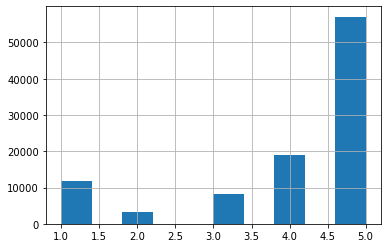

In [67]:
graph = order_reviews_wo['review_score'].hist()

In [68]:
order_reviews_wo['review_score'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

Le dataframe ne semble pas avoir de valeur aberrante.

### Orders

In [69]:
orders.max()

order_id                         fffe41c64501cc87c801fd61db3f6244
customer_id                      ffffe8b65bbe3087b653a978c870db99
order_status                     unavailable                     
order_purchase_timestamp         2018-10-17 17:30:18             
order_approved_at                2018-09-03 17:40:06             
order_delivered_carrier_date     2018-09-11 19:48:28             
order_delivered_customer_date    2018-10-17 13:22:46             
order_estimated_delivery_date    2018-11-12 00:00:00             
dtype: object

In [70]:
orders.min()

order_id                         00010242fe8c5a6d1ba2dd792cb16214
customer_id                      00012a2ce6f8dcda20d059ce98491703
order_status                     approved                        
order_purchase_timestamp         2016-09-04 21:15:19             
order_approved_at                1970-01-01 00:00:00.000000001   
order_delivered_carrier_date     1970-01-01 00:00:00.000000001   
order_delivered_customer_date    1970-01-01 00:00:00.000000001   
order_estimated_delivery_date    2016-09-30 00:00:00             
dtype: object

Nous considérons que la date 1970-01-01 00:00:00.000000001 n'est pas une erreur, c'est la valeur 1 assignée aux nan.

In [71]:
date_cols = orders.select_dtypes(include=['datetime']).columns.tolist()

for col in date_cols:
    val = orders[orders[col] == orders.min()[4]][col].value_counts().sum()
    print(col,':', val)

order_purchase_timestamp : 0
order_approved_at : 160
order_delivered_carrier_date : 1783
order_delivered_customer_date : 2965
order_estimated_delivery_date : 0


In [72]:
for col in date_cols:
    val = orders[orders[col] > orders.min()[4]][col].value_counts().sum()
    print(col,':', val)

order_purchase_timestamp : 99441
order_approved_at : 99281
order_delivered_carrier_date : 97658
order_delivered_customer_date : 96476
order_estimated_delivery_date : 99441


In [73]:
orders_wo = orders[(orders['order_purchase_timestamp'] > orders.min()[4]) & 
                   (orders['order_approved_at'] > orders.min()[4]) & 
                   (orders['order_delivered_carrier_date'] > orders.min()[4]) & 
                   (orders['order_delivered_customer_date'] > orders.min()[4]) & 
                   (orders['order_estimated_delivery_date'] > orders.min()[4])
                  ].reset_index(drop=True)
orders_wo.shape

(96461, 8)

order_purchase_timestamp


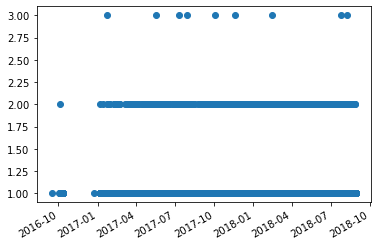

order_approved_at


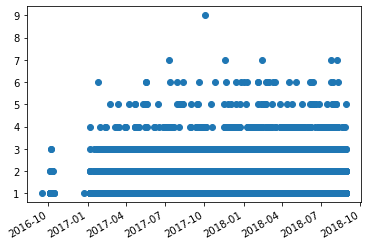

order_delivered_carrier_date


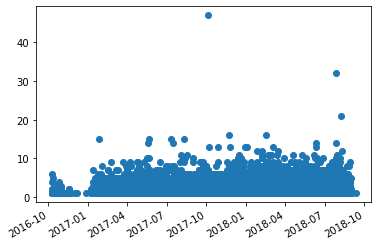

order_delivered_customer_date


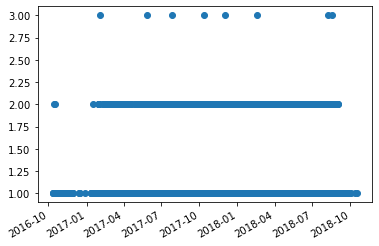

order_estimated_delivery_date


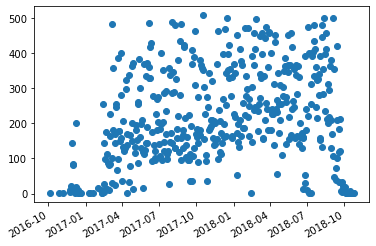

In [74]:
for col in date_cols:
    print(col)
    x = orders_wo[col].unique()
    y = orders_wo[col].value_counts()

    plt.scatter(x,y)
    plt.gcf().autofmt_xdate()
    plt.show()

## Assemblage

- Création des nouveaux features
- Assemblage des dataframes

- **customers**  -> olist_customers_dataset.csv
- **geolocation** -> olist_geolocation_dataset.csv
- **order_items** -> olist_order_items_dataset.csv
- **order_payments** -> olist_order_payments_dataset.csv
- **order_reviews** -> olist_order_reviews_dataset.csv
- **orders** -> olist_orders_dataset.csv
- **products** -> olist_products_dataset.csv
- **sellers** -> olist_sellers_dataset.csv
- **translation** -> product_category_name_translation.csv

In [75]:
#It keeps the original length of order_items that contains the items in each purchase.
#Then, it corrects the column order_id with the orders_wo dataframe since there're orders with
#1970 as date which we decided to delete since there is no way to check if they're outliers or not.
#Finally, we filter with the existing custumer_unique_id since it's the only way to tell appart between customers.
orders_products_merge1 = pd.merge(order_items_wo, sellers_wo, how='left', on='seller_id')
print(orders_products_merge1.shape)
orders_products_merge2 = pd.merge(orders_wo, orders_products_merge1, how='left', on='order_id')
print(orders_products_merge2.shape)
orders_products_merge3 = pd.merge(order_reviews_wo, orders_products_merge2, how='right', on='order_id')
print(orders_products_merge3.shape)
orders_products_merge4 = pd.merge(customers_wo, orders_products_merge3, how='right', on='customer_id')
print(orders_products_merge4.shape)
orders_products_merge5 = pd.merge(products, orders_products_merge4, how='right', on='product_id')
print(orders_products_merge5.shape)
orders_products_merge5['delivery_delay'] = orders_products_merge5['order_delivered_customer_date'] - orders_products_merge5['order_purchase_timestamp']
orders_products_merge5['delivery_delay'] = orders_products_merge5['delivery_delay'].apply(lambda x: x.days)
orders_products_merge5['delay_estimated_real'] = orders_products_merge5['order_estimated_delivery_date'] - orders_products_merge5['order_delivered_customer_date']
orders_products_merge5['delay_estimated_real'] = orders_products_merge5['delay_estimated_real'].apply(lambda x: x.days)

(102425, 10)
(100180, 17)
(100180, 23)
(100180, 27)
(100180, 36)


In [76]:
orders_products_merge5 = orders_products_merge5.dropna(subset=['customer_unique_id'], axis=0).reset_index(drop=True)

orders_products_merge5['customer_state'] = np.where(orders_products_merge5.customer_state.isna(), 
                                                    'no_state', 
                                                    orders_products_merge5.customer_state)
orders_products_merge5['customer_city'] = np.where(orders_products_merge5.customer_city.isna(), 
                                                   'no_city', 
                                                   orders_products_merge5.customer_city)
orders_products_merge5['customer_zip_code_prefix'] = np.where(orders_products_merge5.customer_zip_code_prefix.isna(), 
                                                              'no_zipcode', 
                                                              orders_products_merge5.customer_zip_code_prefix)
orders_products_merge5['seller_state'] = np.where(orders_products_merge5.seller_state.isna(), 
                                                    'no_state', 
                                                    orders_products_merge5.seller_state)
orders_products_merge5['seller_city'] = np.where(orders_products_merge5.seller_city.isna(), 
                                                   'no_city', 
                                                   orders_products_merge5.seller_city)
orders_products_merge5['seller_zip_code_prefix'] = np.where(orders_products_merge5.seller_zip_code_prefix.isna(), 
                                                              'no_zipcode', 
                                                              orders_products_merge5.seller_zip_code_prefix)

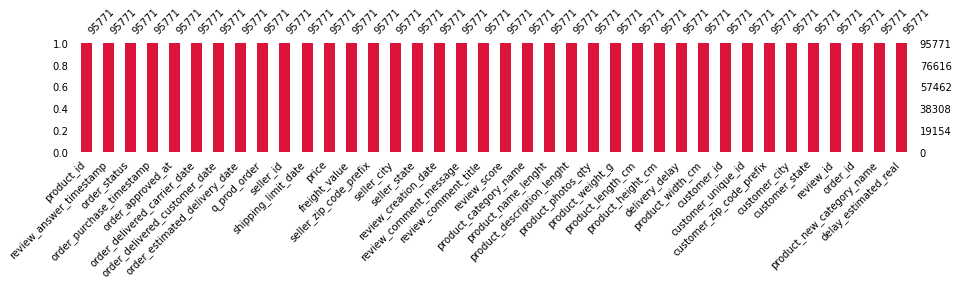

In [77]:
msno.bar(orders_products_merge5, figsize=(15,2), fontsize=10, color='crimson', inline=True, sort='ascending')

In [78]:
#Même idée que pour orders_products_merge5
orders_payments_merge1 = pd.merge(customers_wo, orders_wo, how='right', on='customer_id')
print(orders_payments_merge1.shape)
orders_payments_merge2 = pd.merge(order_payments_wo, orders_payments_merge1, how='right', on='order_id')
print(orders_payments_merge2.shape)
orders_payments_merge3 = pd.merge(order_tot_items, orders_payments_merge2, how='right', on='order_id')
print(orders_payments_merge3.shape)

(96461, 12)
(100740, 16)
(100740, 17)


In [79]:
orders_payments_merge3 = orders_payments_merge3.dropna(subset=['customer_unique_id', 'payment_value', 'payment_type', 'payment_sequential'], axis=0).reset_index(drop=True)

orders_payments_merge3['customer_state'] = np.where(orders_payments_merge3.customer_state.isna(), 
                                                    'no_state', 
                                                    orders_payments_merge3.customer_state)
orders_payments_merge3['customer_city'] = np.where(orders_payments_merge3.customer_city.isna(), 
                                                   'no_city', 
                                                   orders_payments_merge3.customer_city)
orders_payments_merge3['customer_zip_code_prefix'] = np.where(orders_payments_merge3.customer_zip_code_prefix.isna(), 
                                                              'no_zipcode', 
                                                              orders_payments_merge3.customer_zip_code_prefix)

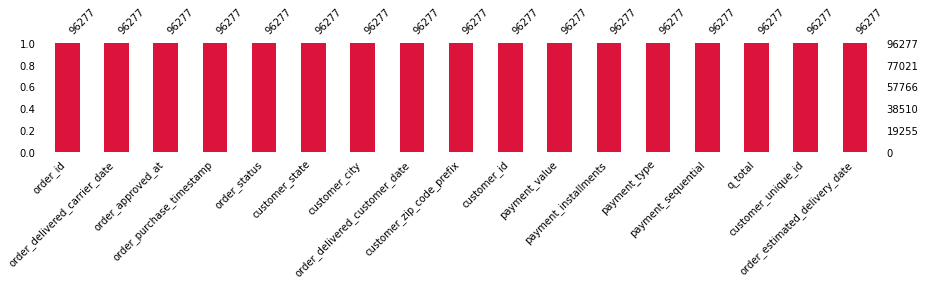

In [80]:
msno.bar(orders_payments_merge3, figsize=(15,2), fontsize=10, color='crimson', inline=True, sort='ascending')

In [81]:
cui_1 = set(orders_products_merge5.customer_unique_id.unique())
cui_2 = set(orders_payments_merge3.customer_unique_id.unique())
print(len(cui_1 - cui_2))
print(len(cui_2 - cui_1))
if len(cui_1-cui_2) > 0:
    print('customer_unique_id in merge5 but not in merge3:', cui_1 - cui_2)
if len(cui_2-cui_1) > 0:
    print(cui_2 - cui_1)    

3
0
customer_unique_id in merge5 but not in merge3: {'f54cea27c80dc09bfe07b1cf1e01b845', '830d5b7aaa3b6f1e9ad63703bec97d23', '9925e1d7dff0d807355599dee04830ab'}


In [82]:
to_del = ['830d5b7aaa3b6f1e9ad63703bec97d23', '9925e1d7dff0d807355599dee04830ab', 'f54cea27c80dc09bfe07b1cf1e01b845']
orders_products_merge5 = orders_products_merge5[~orders_products_merge5['customer_unique_id'].isin(to_del)]

In [83]:
sells_by_city_q = orders_products_merge5.groupby('customer_city')['order_id'].count()
sells_by_city_q.sort_values(ascending=False).head(15)

customer_city
são paulo                15712
rio de janeiro           6830 
belo horizonte           2804 
brasília                 2075 
curitiba                 1537 
porto alegre             1400 
campinas                 1256 
salvador                 1224 
guarulhos                1182 
são bernardo do campo    938  
niterói                  861  
santo andré              805  
osasco                   755  
santos                   728  
goiânia                  654  
Name: order_id, dtype: int64

In [84]:
sells_by_cities_s = orders_payments_merge3.groupby('customer_city')['payment_value'].sum()
sells_by_cities_s.sort_values(ascending=False).head(15)

customer_city
são paulo                2108014.80
rio de janeiro           1112156.04
belo horizonte           406050.87 
brasília                 333872.30 
curitiba                 238582.26 
porto alegre             214667.83 
salvador                 205864.57 
campinas                 180360.01 
guarulhos                157629.92 
niterói                  135458.19 
são bernardo do campo    116785.21 
fortaleza                112106.04 
santos                   111115.60 
goiânia                  109115.51 
recife                   104795.50 
Name: payment_value, dtype: float64

In [85]:
best_category_q = orders_products_merge5.groupby('product_new_category_name')['order_id'].count()
best_category_q.sort_values(ascending=False).head(15)

product_new_category_name
home          17079
tech          14752
beauty        11467
fashion       11417
appliances    7738 
sports        7350 
other         7152 
culture       5497 
garden        5043 
office        3438 
tools         1889 
no_name       1348 
food          935  
services      663  
Name: order_id, dtype: int64

In [86]:
best_category_s = orders_products_merge5.groupby('product_new_category_name')['price'].sum()
best_category_s.sort_values(ascending=False).head(15)

product_new_category_name
fashion       1772034.39
home          1649774.71
tech          1599812.53
beauty        1490297.26
other         1101364.04
appliances    1019843.24
sports        858265.47 
culture       721569.94 
garden        592140.65 
office        409312.60 
tools         298745.33 
no_name       156227.85 
services      122308.06 
food          54586.00  
Name: price, dtype: float64

In [87]:
delivery_delay = orders_products_merge5.groupby('delivery_delay')['delivery_delay'].count()
delivery_delay.sort_values(ascending=False).head(15)

delivery_delay
7     7673
6     6817
8     6729
9     6026
5     5859
10    5619
11    5056
4     4901
12    4629
13    4286
3     3920
14    3758
2     3238
15    3101
16    2582
Name: delivery_delay, dtype: int64

In [88]:
category_review_m = orders_products_merge5.groupby('product_new_category_name')['review_score'].mean()
category_review_m.sort_values(ascending=False).head(15)

product_new_category_name
food          4.327273
culture       4.243042
beauty        4.222639
sports        4.202177
garden        4.189768
appliances    4.171750
other         4.161633
fashion       4.124814
services      4.122172
tools         4.066702
tech          4.056670
office        4.042757
no_name       3.991098
home          3.962527
Name: review_score, dtype: float64

In [89]:
payment_method_q = orders_payments_merge3.groupby('payment_type')['order_id'].count()
payment_method_q.sort_values(ascending=False).head(15)

payment_type
credit_card    71329
boleto         18299
voucher        5219 
debit_card     1430 
Name: order_id, dtype: int64

Per client :
- Code client
- Code postale
- Ville
- Province/Etat
- Nombre des achats éfectués
- Total dépensé
- Achat moyenne
- Maximum dépensé
- Méthode de payment préférée
- Catégorie la plus achetée
- Quantitée totale des produits achetés
- Quantitée moyenne des produits par achat
- Quantitée maximale des produits achetés
- Délai de livraison moyen
- Délai maximale
- Première achat (timestamp)
- Dermière achat (timestamp)
- Review moyenne
- Poids moyenne par commande
- Poids total acheté
- Quantitée dépensée par catégorie

In [90]:
orders_placed = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['order_id'].count()
orders_placed = orders_placed.rename('orders_placed').to_frame().reset_index()
print(orders_placed.shape)

(89233, 2)


In [91]:
total_spent = orders_payments_merge3.drop_duplicates(subset='order_id').groupby('customer_unique_id')['payment_value'].sum()
total_spent = total_spent.rename('total_spent').to_frame().reset_index()
print(total_spent.shape)

(89233, 2)


In [92]:
avg_order = orders_payments_merge3.drop_duplicates(subset='order_id').groupby('customer_unique_id')['payment_value'].mean()
avg_order = avg_order.rename('avg_order').to_frame().reset_index()
print(avg_order.shape)

(89233, 2)


In [93]:
max_order = orders_payments_merge3.drop_duplicates(subset='order_id').groupby('customer_unique_id')['payment_value'].max()
max_order = max_order.rename('max_order').to_frame().reset_index()
print(max_order.shape)

(89233, 2)


In [94]:
prefered_payment_type = orders_payments_merge3.groupby(['customer_unique_id', 'payment_type'])['payment_value'].sum().to_frame().reset_index()
prefered_payment_type = prefered_payment_type.sort_values('payment_value', ascending=False).drop_duplicates('customer_unique_id', keep='first').reset_index(drop=True)
prefered_payment_type = prefered_payment_type.drop('payment_value', axis=1).rename(columns={'payment_type':'prefered_payment_type'})
print(prefered_payment_type.shape)

(89233, 2)


In [95]:
prefered_product_category = orders_products_merge5.groupby(['customer_unique_id', 'product_new_category_name'])['q_prod_order'].sum().to_frame().reset_index()
prefered_product_category = prefered_product_category.sort_values('q_prod_order', ascending=False).drop_duplicates('customer_unique_id', keep='first').reset_index(drop=True)
prefered_product_category = prefered_product_category.drop('q_prod_order', axis=1).rename(columns={'product_new_category_name':'prefered_product_category'})
print(prefered_product_category.shape)

(89233, 2)


In [96]:
total_products_bought = orders_payments_merge3.drop_duplicates(subset='order_id').groupby('customer_unique_id')['q_total'].sum()
total_products_bought = total_products_bought.rename('total_products_bought').to_frame().reset_index()
print(total_products_bought.shape)

(89233, 2)


In [97]:
avg_order_products = orders_payments_merge3.drop_duplicates(subset='order_id').groupby('customer_unique_id')['q_total'].mean()
avg_order_products = avg_order_products.rename('avg_order_products').to_frame().reset_index()
print(avg_order_products.shape)

(89233, 2)


In [98]:
max_order_products = orders_payments_merge3.drop_duplicates(subset='order_id').groupby('customer_unique_id')['q_total'].max()
max_order_products = max_order_products.rename('max_order_products').to_frame().reset_index()
print(max_order_products.shape)

(89233, 2)


In [99]:
avg_delivery_delay = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['delivery_delay'].mean()
avg_delivery_delay = avg_delivery_delay.rename('avg_delivery_delay').to_frame().reset_index()
print(avg_delivery_delay.shape)

(89233, 2)


In [100]:
max_delivery_delay = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['delivery_delay'].max()
max_delivery_delay = max_delivery_delay.rename('max_delivery_delay').to_frame().reset_index()
print(max_delivery_delay.shape)

(89233, 2)


In [101]:
first_order_date = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['order_purchase_timestamp'].min()
first_order_date = first_order_date.rename('first_order_date').to_frame().reset_index()
print(first_order_date.shape)

(89233, 2)


In [102]:
last_order_date = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['order_purchase_timestamp'].max()
last_order_date = last_order_date.rename('last_order_date').to_frame().reset_index()
print(last_order_date.shape)

(89233, 2)


In [103]:
avg_review_score = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['review_score'].mean()
avg_review_score = avg_review_score.rename('avg_review_score').to_frame().reset_index()
print(avg_review_score.shape)

(89233, 2)


In [104]:
total_weight_g = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['product_weight_g'].sum()
total_weight_g = total_weight_g.rename('total_weight_g').to_frame().reset_index()
print(total_weight_g.shape)

(89233, 2)


In [105]:
avg_weight_g = orders_products_merge5.drop_duplicates(subset='order_id').groupby('customer_unique_id')['product_weight_g'].mean()
avg_weight_g = avg_weight_g.rename('avg_weight_g').to_frame().reset_index()
print(avg_weight_g.shape)

(89233, 2)


In [106]:
orders_products_merge5['category_subtotal'] = (orders_products_merge5['price'] + orders_products_merge5['freight_value']) * orders_products_merge5['q_prod_order']
purchase_by_category = orders_products_merge5.groupby(['customer_unique_id', 'product_new_category_name'])['category_subtotal'].sum().to_frame().reset_index()
purchase_by_category = purchase_by_category.dropna(subset=['category_subtotal'], axis=0).reset_index(drop=True)
purchase_by_category = pd.DataFrame(purchase_by_category.pivot_table('category_subtotal', 'customer_unique_id', 'product_new_category_name').to_records()).fillna(0)
print(purchase_by_category.shape)

(89233, 15)


In [107]:
merge1 = pd.merge(orders_placed, total_spent, on='customer_unique_id')
merge2 = pd.merge(avg_order, merge1, on='customer_unique_id')
merge3 = pd.merge(max_order, merge2, on='customer_unique_id')
merge4 = pd.merge(prefered_payment_type, merge3, on='customer_unique_id')
merge5 = pd.merge(prefered_product_category, merge4, on='customer_unique_id')
merge6 = pd.merge(total_products_bought, merge5, on='customer_unique_id')
merge7 = pd.merge(avg_order_products, merge6, on='customer_unique_id')
merge8 = pd.merge(max_order_products, merge7, on='customer_unique_id')
merge9 = pd.merge(avg_delivery_delay, merge8, on='customer_unique_id')
merge10 = pd.merge(max_delivery_delay, merge9, on='customer_unique_id')
merge11 = pd.merge(first_order_date, merge10, on='customer_unique_id')
merge12 = pd.merge(last_order_date, merge11, on='customer_unique_id')
merge13 = pd.merge(avg_review_score, merge12, on='customer_unique_id')
merge14 = pd.merge(total_weight_g, merge13, on='customer_unique_id')
merge15 = pd.merge(avg_weight_g, merge14, on='customer_unique_id')
merge16 = pd.merge(orders_products_merge5.drop_duplicates(subset='customer_unique_id')[['customer_unique_id', 'customer_city']], merge15, on='customer_unique_id', how='right')
merge17 = pd.merge(orders_products_merge5.drop_duplicates(subset='customer_unique_id')[['customer_unique_id', 'customer_state']], merge16, on='customer_unique_id', how='right')
merge18 = pd.merge(orders_products_merge5.drop_duplicates(subset='customer_unique_id')[['customer_unique_id', 'customer_zip_code_prefix']], merge17, on='customer_unique_id', how='right')
df_client = pd.merge(purchase_by_category, merge18, on='customer_unique_id')
df_client['avg_delivery_delay'] = df_client['avg_delivery_delay'].astype('int64')
df_client.shape

(89233, 34)

In [108]:
df_client = df_client[['customer_unique_id', 
                       'customer_city',
                       'customer_state',
                       'customer_zip_code_prefix',
                       'total_spent', 
                       'orders_placed', 
                       'total_products_bought', 
                       'prefered_product_category', 
                       'prefered_payment_type', 
                       'avg_review_score', 
                       'max_order_products', 
                       'avg_order_products', 
                       'avg_order', 
                       'max_order', 
                       'total_weight_g', 
                       'avg_weight_g', 
                       'avg_delivery_delay', 
                       'max_delivery_delay', 
                       'first_order_date', 
                       'last_order_date', 
                       'appliances', 
                       'beauty', 
                       'culture', 
                       'fashion', 
                       'food', 
                       'garden', 
                       'home', 
                       'no_name',
                       'office',
                       'other',
                       'services', 
                       'sports', 
                       'tech', 
                       'tools']]

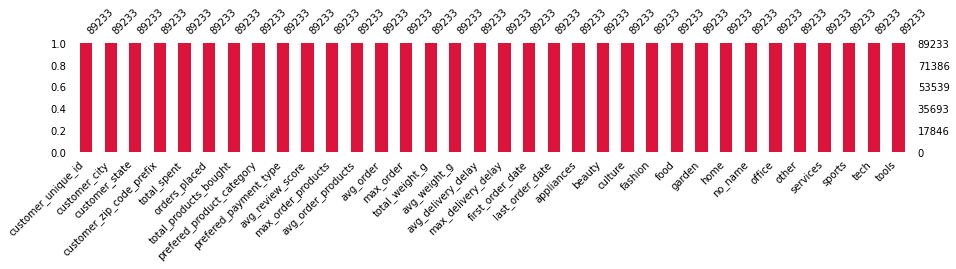

In [109]:
msno.bar(df_client, figsize=(15,2), fontsize=10, color='crimson', inline=True)

# Exploration dataframe des clients (df_client)

#### Date range

In [110]:
print('First registered order:', orders_products_merge5['order_purchase_timestamp'].min())
print('Last registered order:', orders_products_merge5['order_purchase_timestamp'].max())

First registered order: 2016-10-03 09:44:50
Last registered order: 2018-08-29 15:00:37


#### Clients

In [111]:
unique_clients = df_client['customer_unique_id'].nunique()
print('Unique clients:', unique_clients)

Unique clients: 89233


#### Orders

In [112]:
unique_orders = df_client['orders_placed'].sum()
print('Total amount of registered orders:', unique_orders)
print('Ratio orders per client:', '{0:.4f}'.format(unique_orders / unique_clients))

Total amount of registered orders: 92208
Ratio orders per client: 1.0333


#### Sellers

In [113]:
unique_sellers = orders_products_merge5['seller_id'].nunique()
print('Unique sellers with registered sales:', unique_sellers)

Unique sellers with registered sales: 2937


#### Products

In [114]:
unique_prod_id = orders_products_merge5['product_id'].nunique()
prods_sold_total = df_client['total_products_bought'].sum()
print('Unique products:', unique_prod_id)
print('Products sold in total:', prods_sold_total)
print('Ratio products sold per order:', '{0:.4f}'.format(prods_sold_total / unique_orders))
print('Ratio products sold per client:', '{0:.4f}'.format(prods_sold_total / unique_clients))
print('Ratio products sold per seller:', '{0:.4f}'.format(prods_sold_total / unique_sellers))

Unique products: 31359
Products sold in total: 105357
Ratio products sold per order: 1.1426
Ratio products sold per client: 1.1807
Ratio products sold per seller: 35.8723


## Distribution des variables (df_client)

Nous retirons 1% pour éviter les biais


- IQR = Q1 - Q3
- Outliers :
    - Lower fence = Q1 - 1.5 * IQR
    - Upper fence = Q3 + 1.5 * IQR

In [115]:
def del_outliers(df, cols):
    temp = df.copy()
    i_outliers = [] #list of indexs for each column
    outliers = [] #list with all the indexs
    for col in cols:
        i_outliers.append(temp[temp[col] > temp[col].quantile(0.99)].index.tolist())
        i_outliers.append(temp[temp[col] < temp[col].quantile(0.01)].index.tolist())

    for i_col in i_outliers:
        for i in i_col:
            outliers.append(i)
        
    temp[temp.index.isin(outliers)] = np.nan #convert the outliers into nan
    return temp.dropna() #drop the rows with the nan (outliers)

cols = df_client.select_dtypes(['int64', 'float64']).columns.tolist()
df_client_wo = del_outliers(df_client, cols)
df_client_wo.reset_index(drop=True, inplace=True)

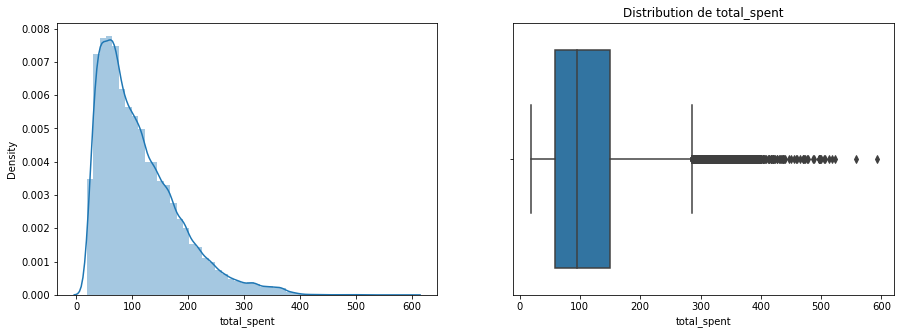

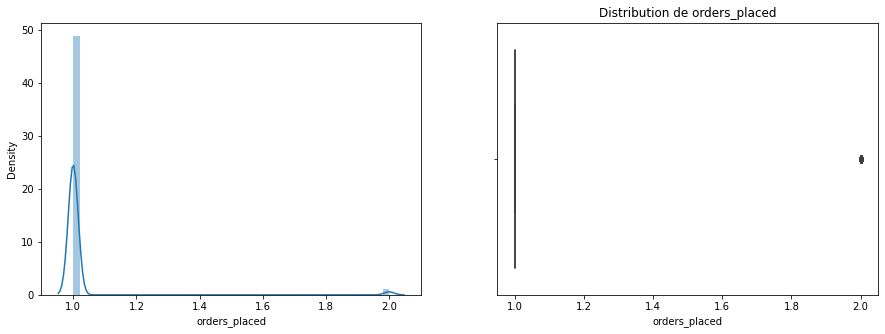

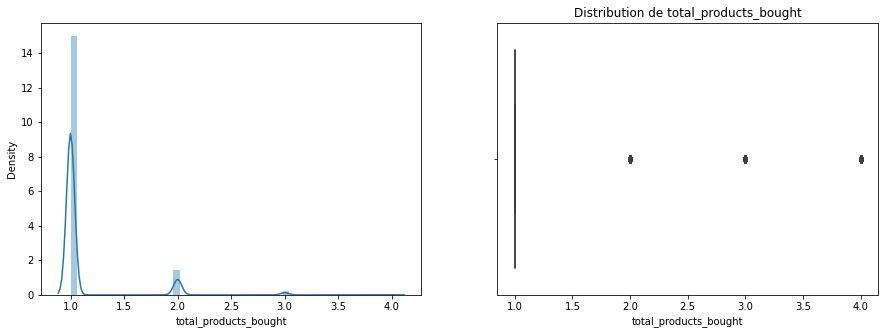

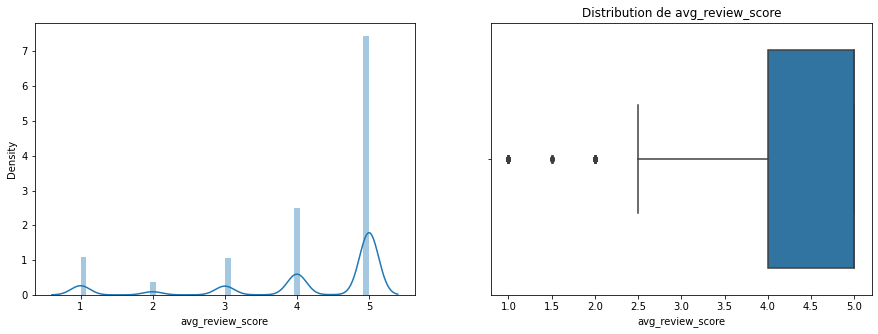

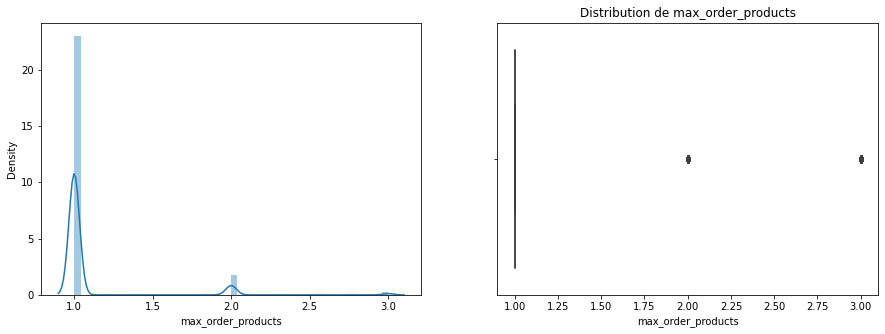

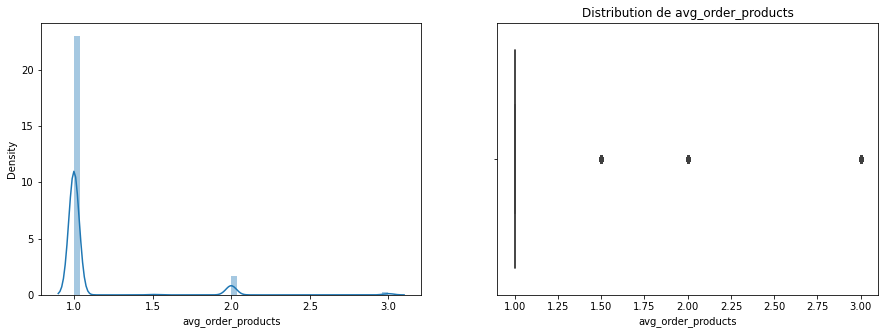

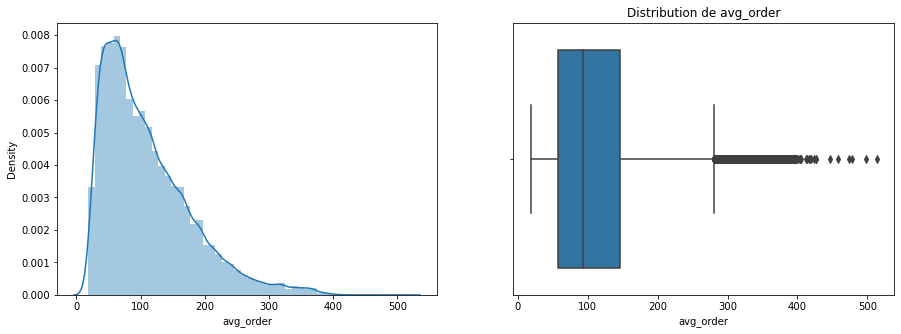

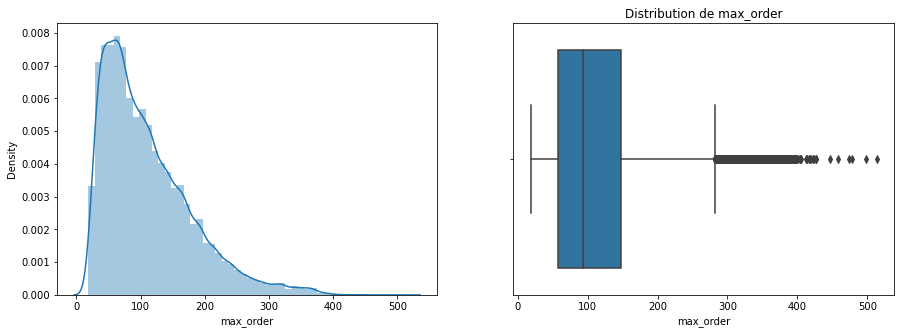

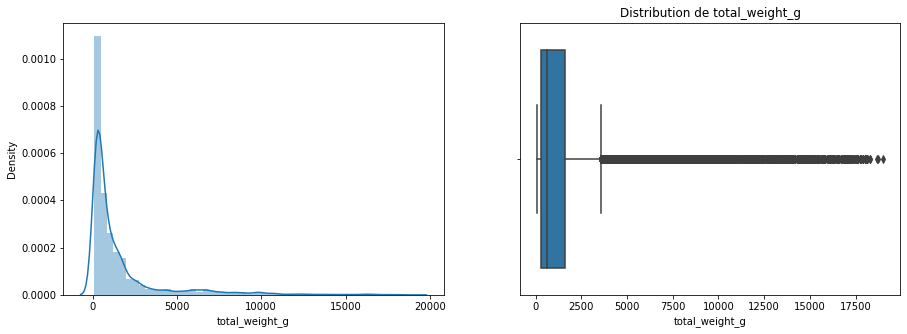

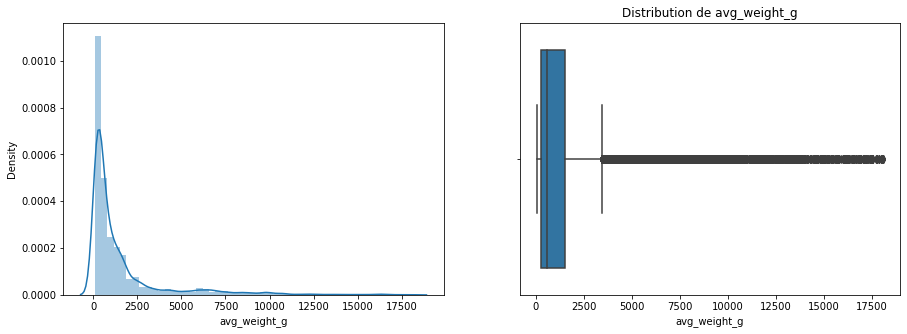

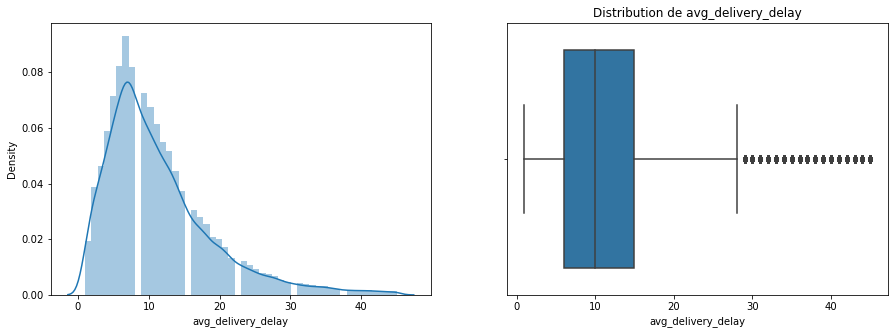

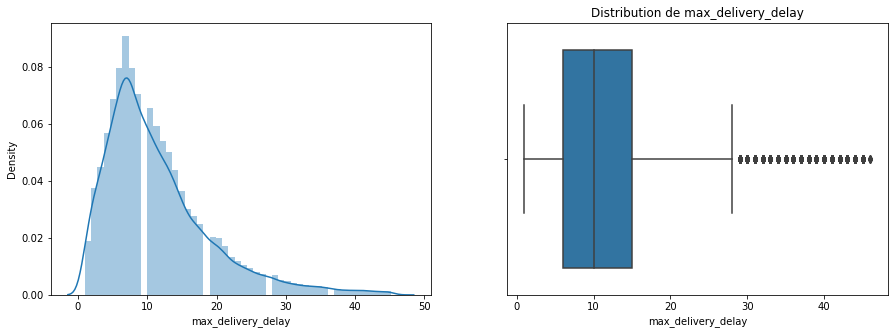

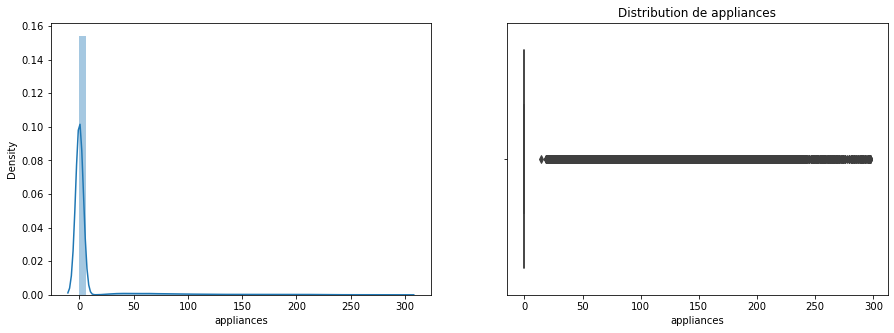

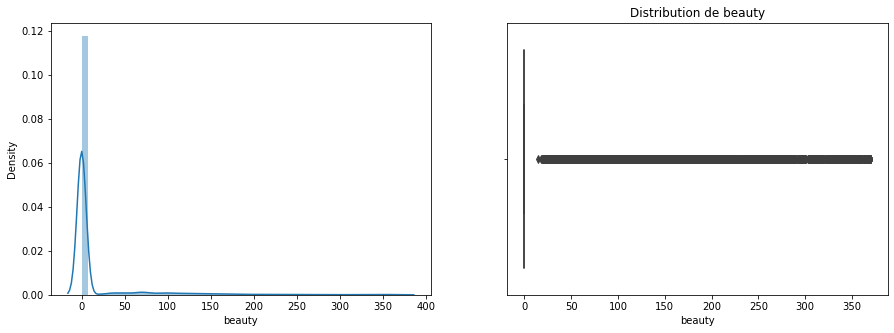

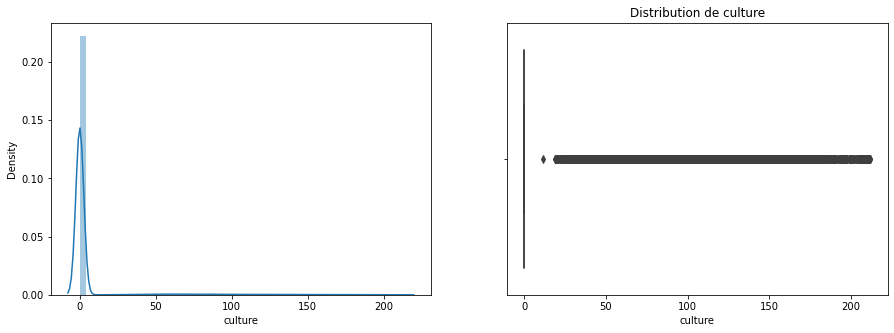

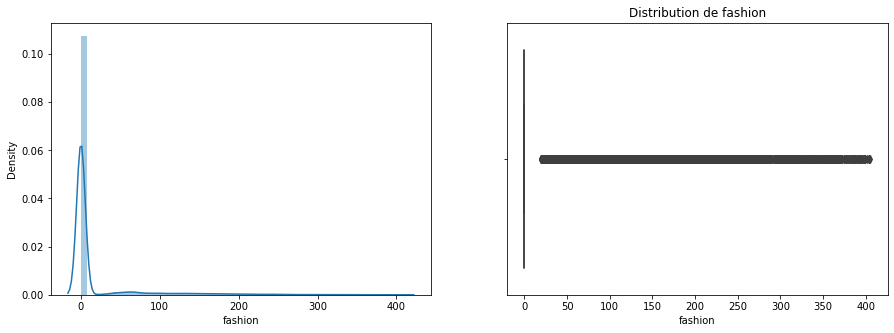

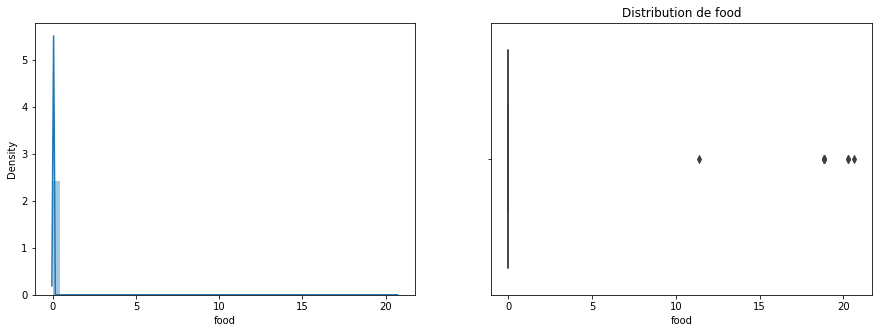

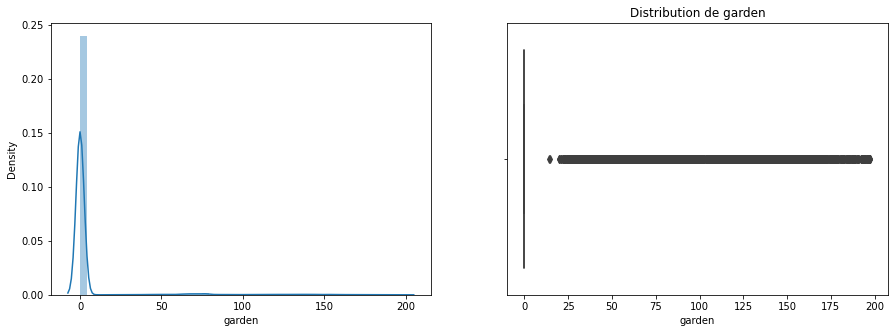

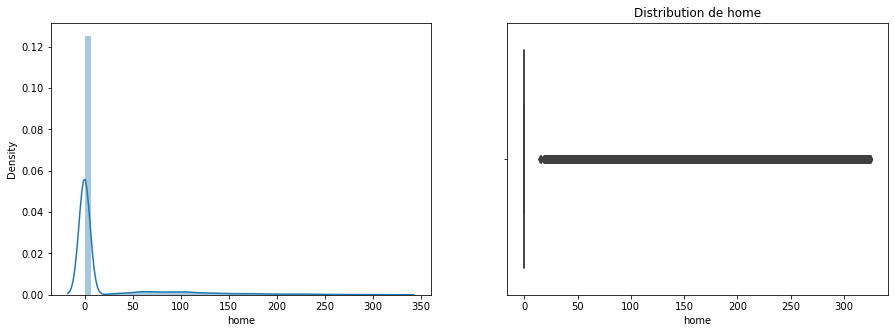

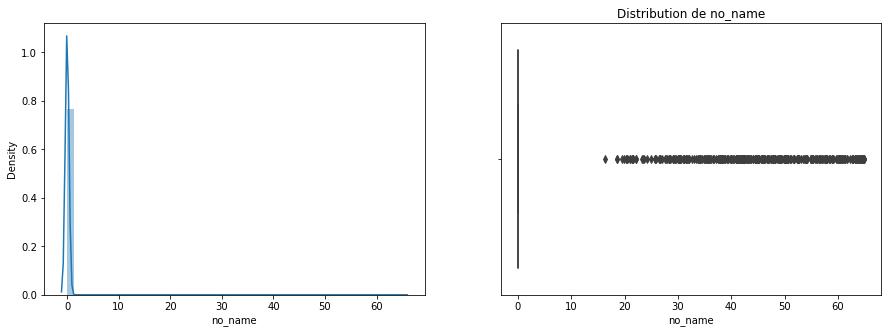

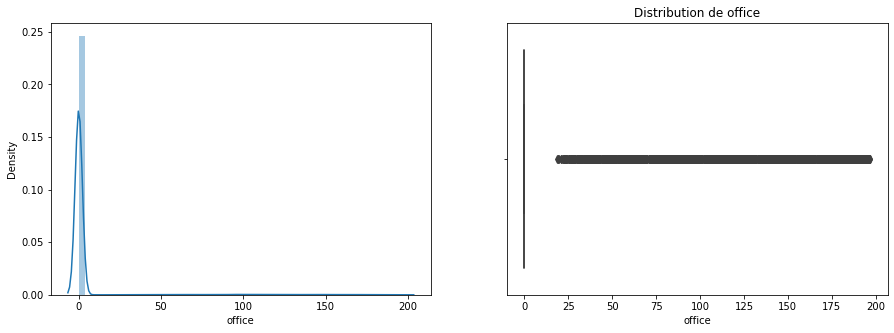

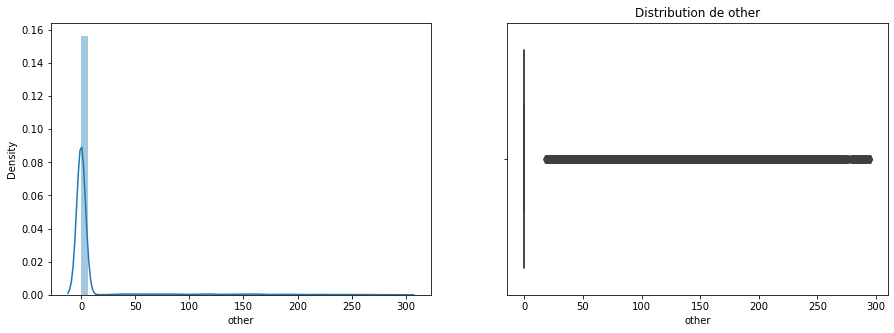

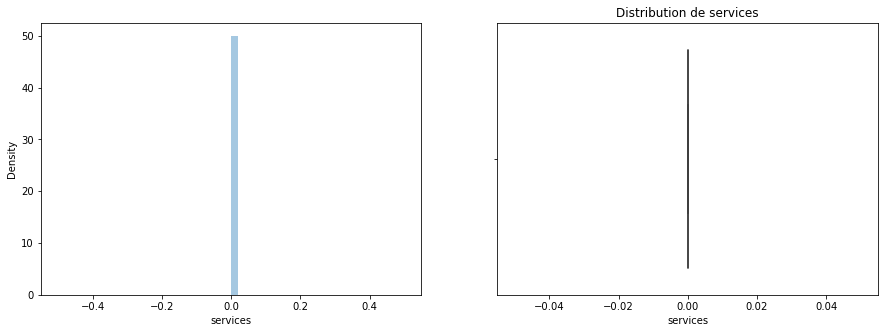

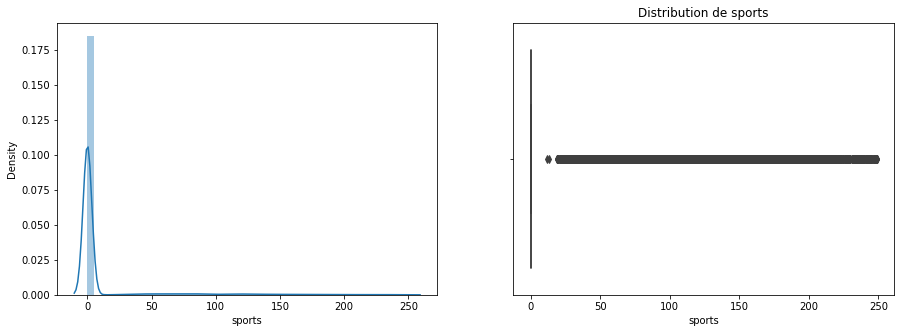

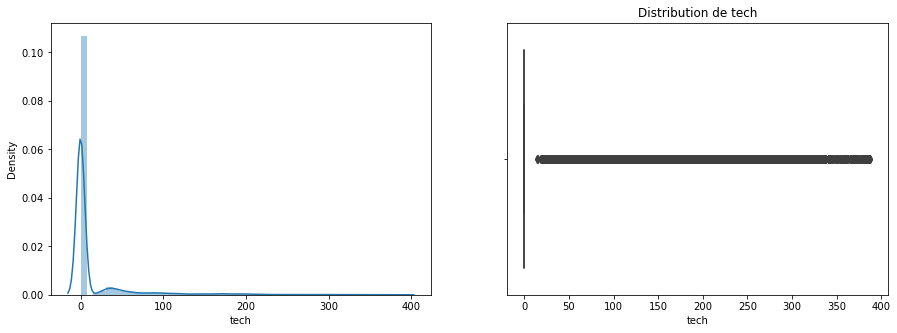

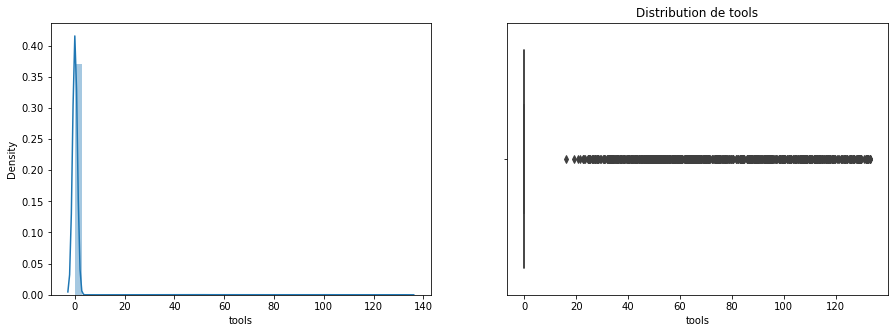

In [116]:
for col in df_client_wo.select_dtypes(['int64', 'float64']).columns:
    f, axes = plt.subplots(1,2, figsize=(15,5))
    title = 'Distribution de ' + str(col)
    plt.title(title)
    sns.distplot(df_client_wo[col], bins=50, ax=axes[0])
    sns.boxplot(df_client_wo[col], ax=axes[1])
    plt.show()

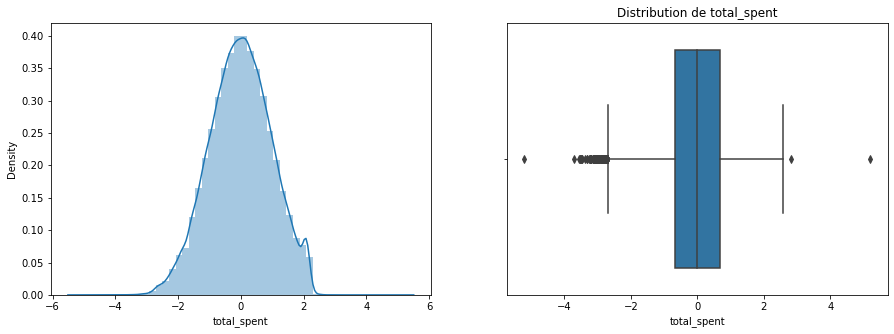

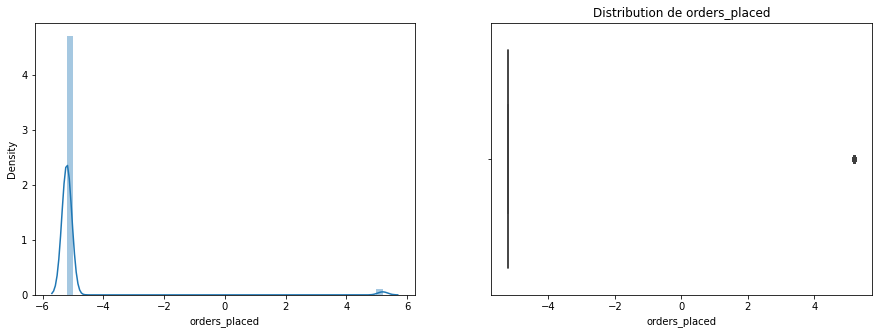

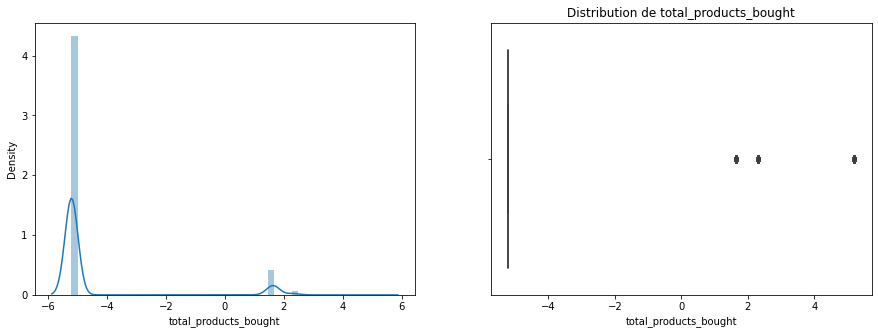

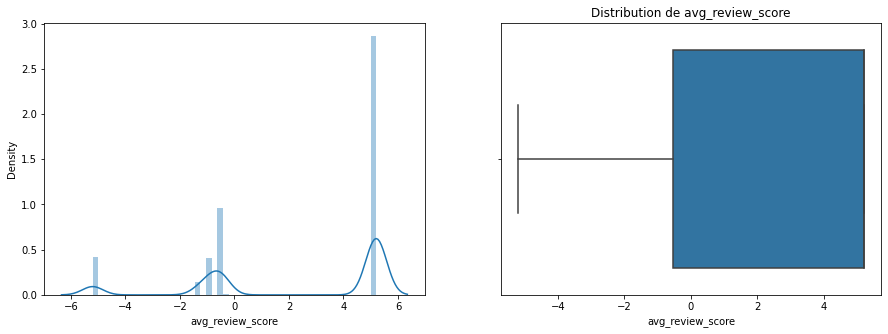

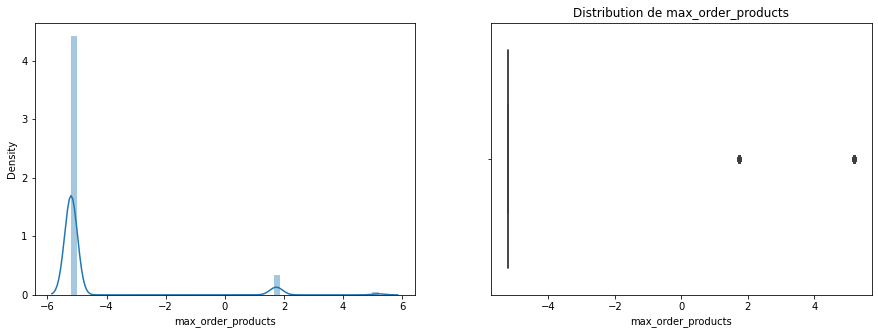

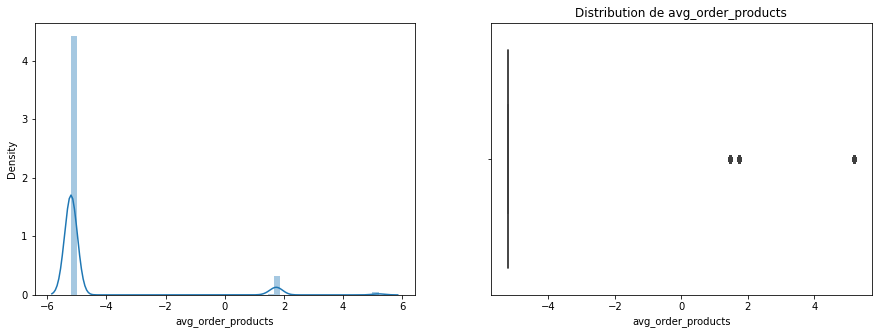

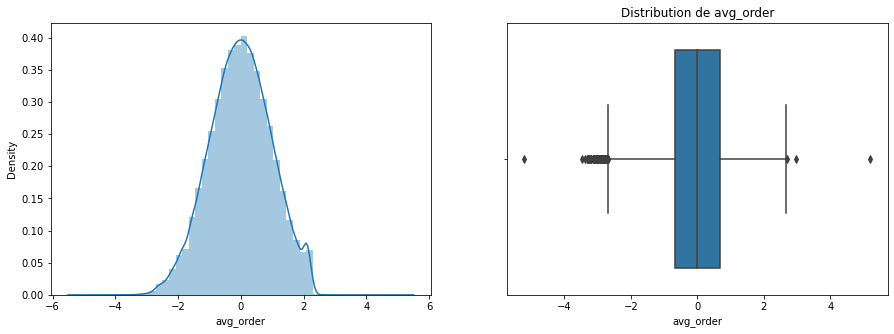

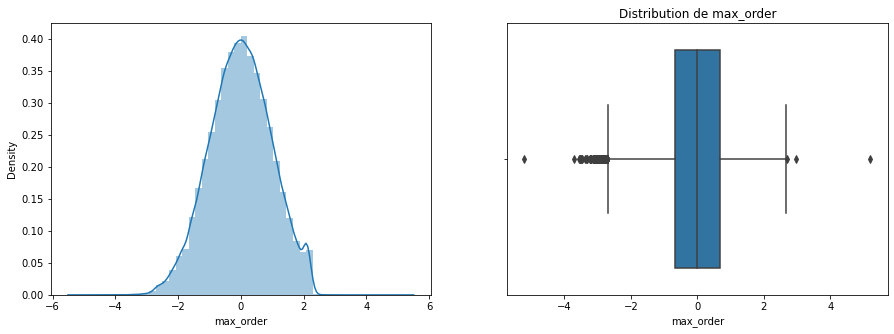

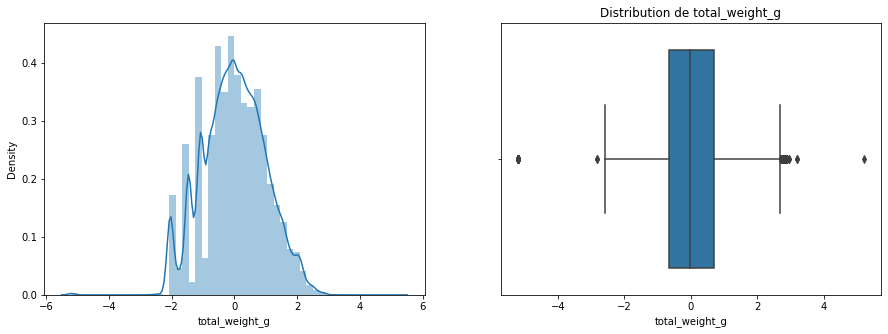

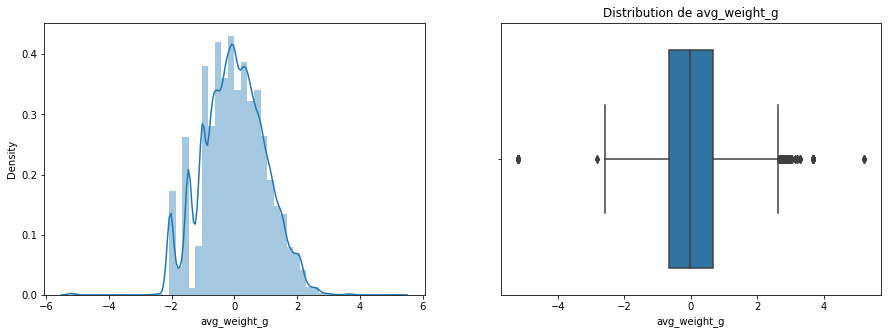

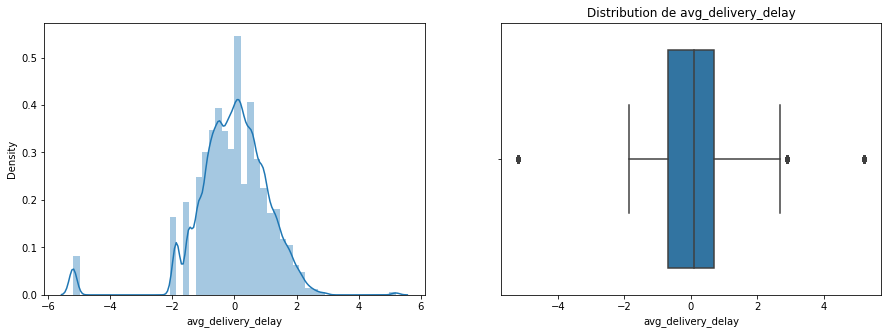

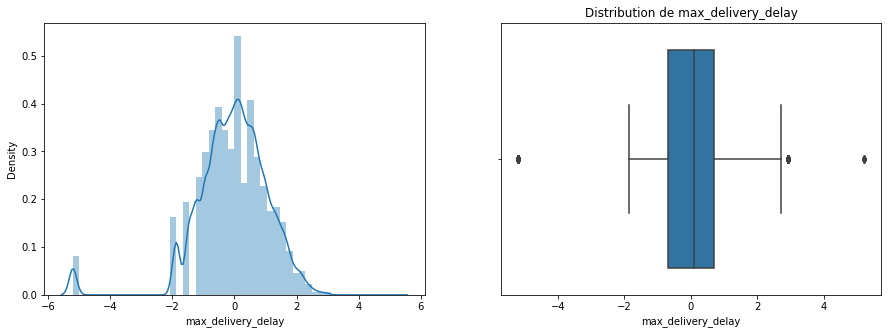

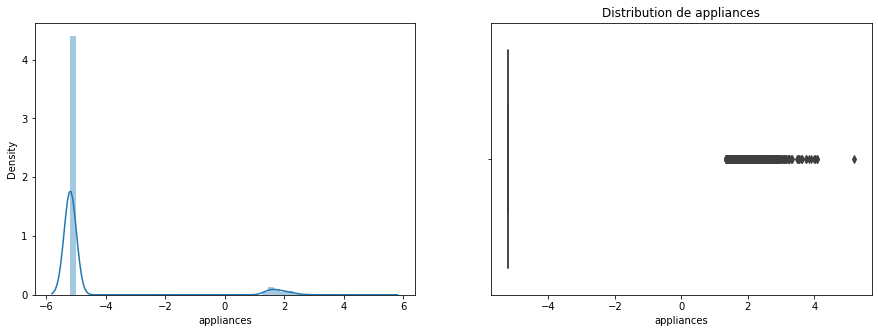

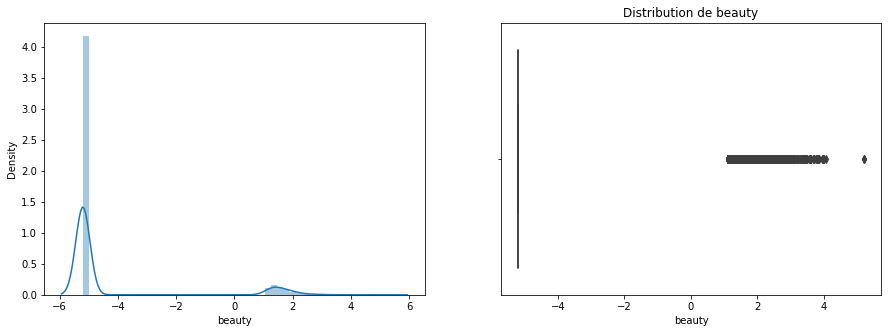

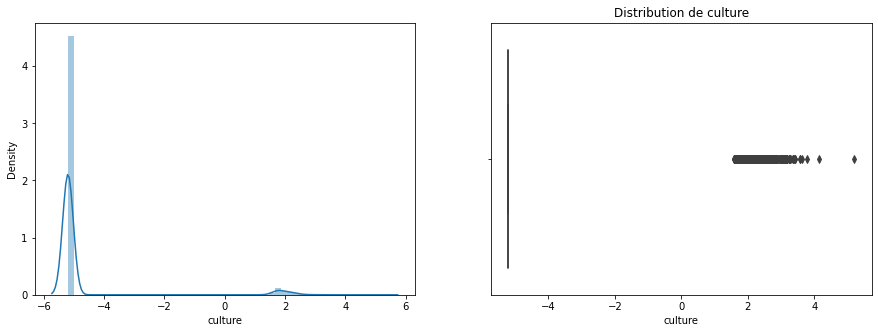

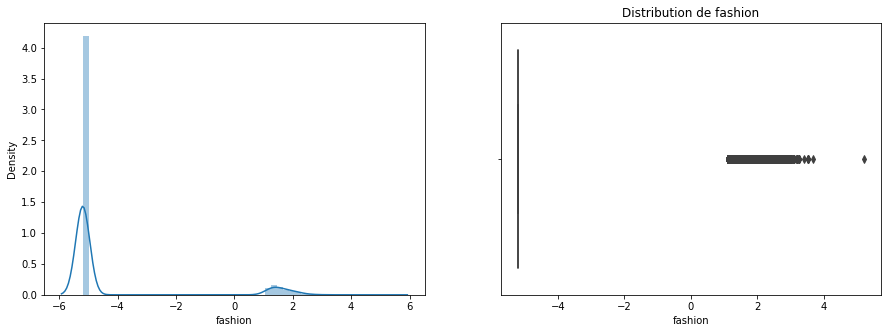

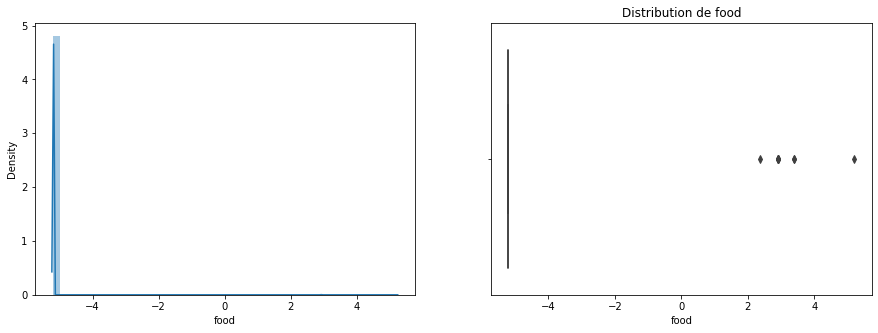

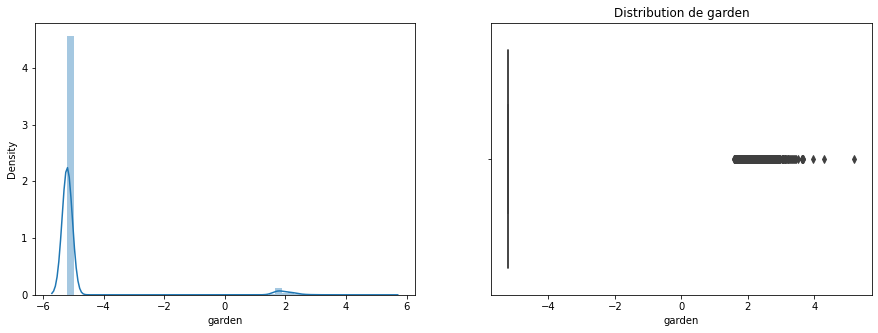

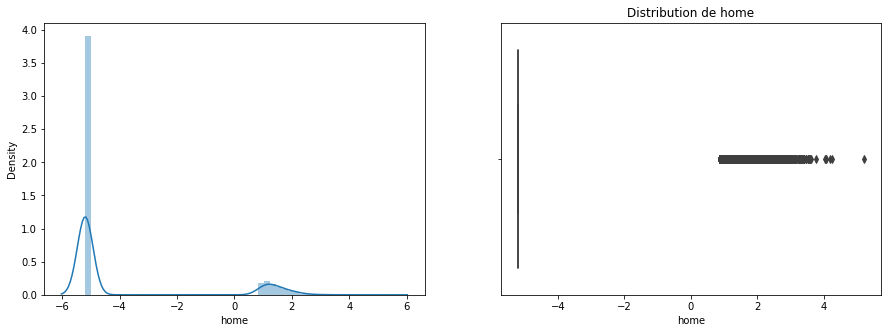

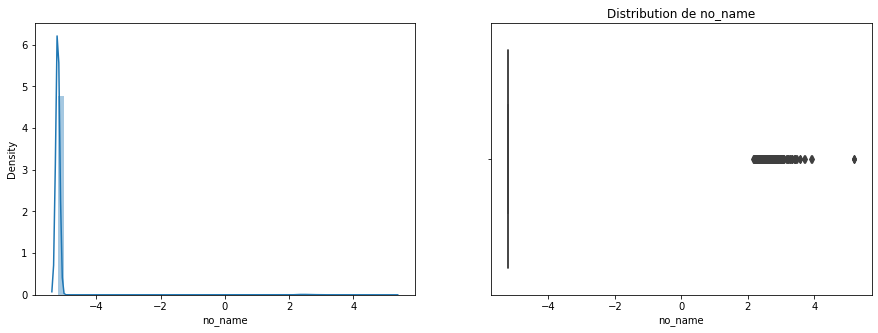

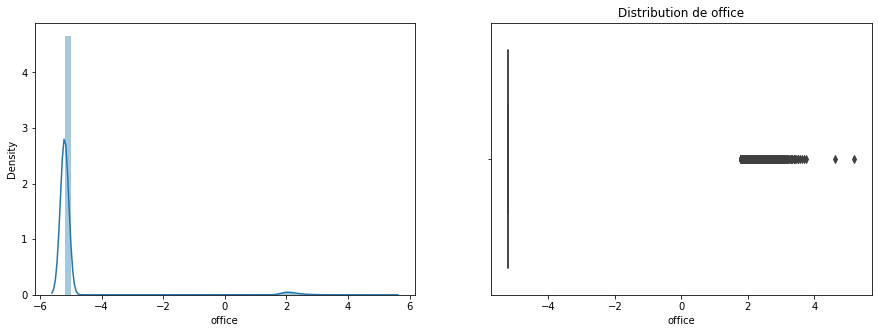

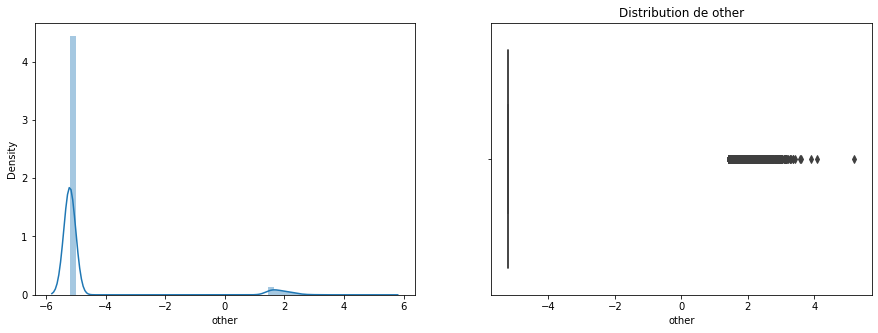

Error :  services


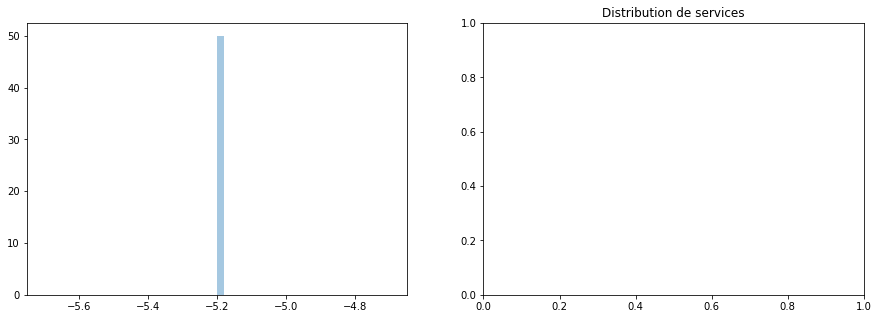

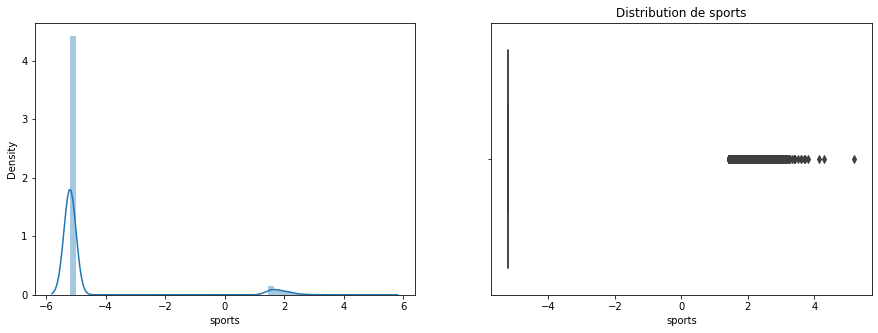

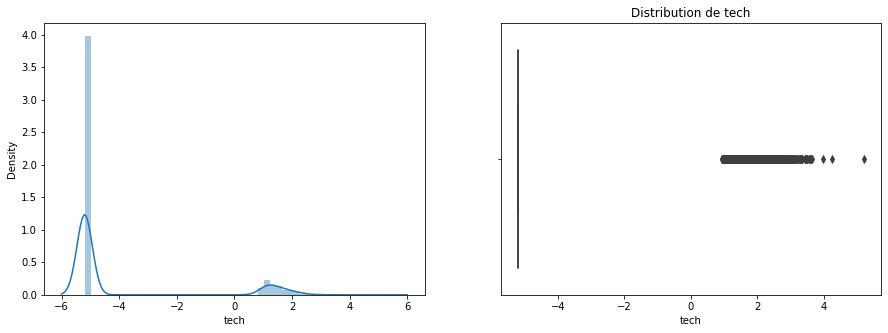

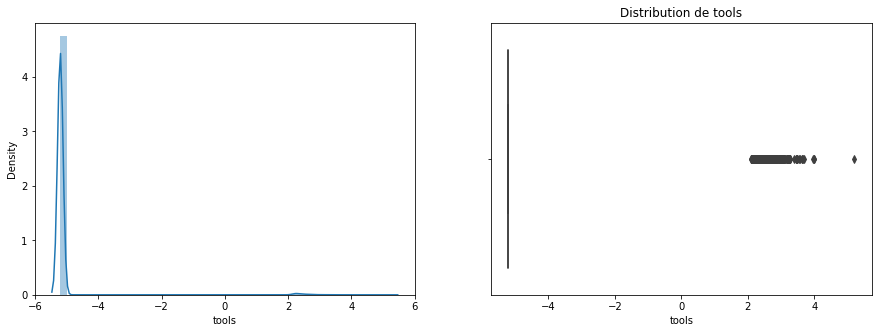

In [117]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

qt = QuantileTransformer(output_distribution="normal", n_quantiles=50, random_state=0)

pt = PowerTransformer()
minMax = MinMaxScaler(feature_range=(-4,4))

df_client_t = df_client_wo.copy()

for col in df_client_t.select_dtypes(['int64', 'float64']).columns:
    df_client_t[col] = qt.fit_transform(df_client_t[[col]])
    
for col in df_client_t.select_dtypes(['int64', 'float64']).columns:
    try:
        f, axes = plt.subplots(1,2, figsize=(15,5))
        title = 'Distribution de ' + str(col)
        plt.title(title)
        sns.distplot(df_client_t[col], bins=50, ax=axes[0])
        sns.boxplot(df_client_t[col], ax=axes[1])
        plt.show()
    except:
        print('Error : ', col)

<AxesSubplot:title={'center':'Top 10 States by clients'}, ylabel='customer_state'>

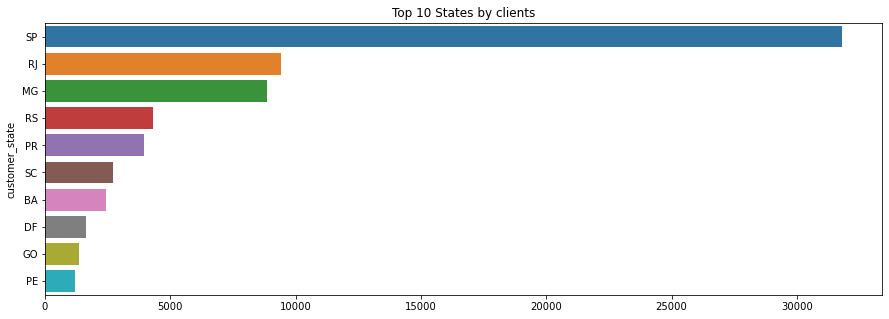

In [118]:
state = df_client_wo.groupby(['customer_state']).count().sort_values('customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(15,5))
plt.title('Top 10 States by clients')
sns.barplot(x=state.values, y=state.index)

<AxesSubplot:title={'center':'Top 10 Cities by clients'}, ylabel='customer_city'>

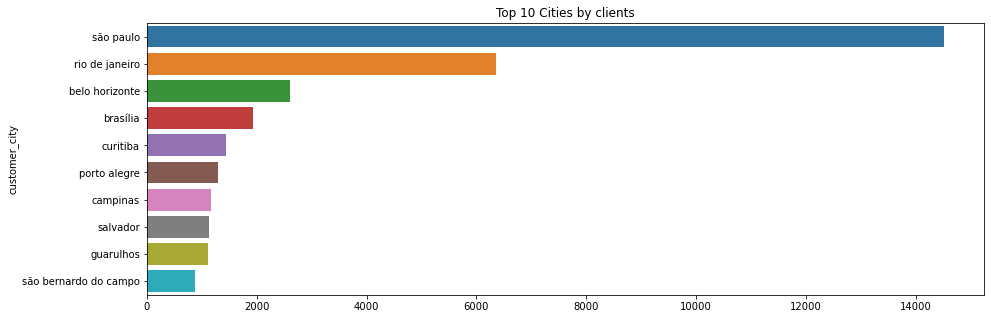

In [119]:
cities = df_client.groupby(['customer_city']).count().sort_values('customer_state', ascending=False)['customer_state'].head(10)
plt.figure(figsize=(15,5))
plt.title('Top 10 Cities by clients')
sns.barplot(x=cities.values, y=cities.index)

<AxesSubplot:title={'center':'Categories by popularity'}, ylabel='prefered_product_category'>

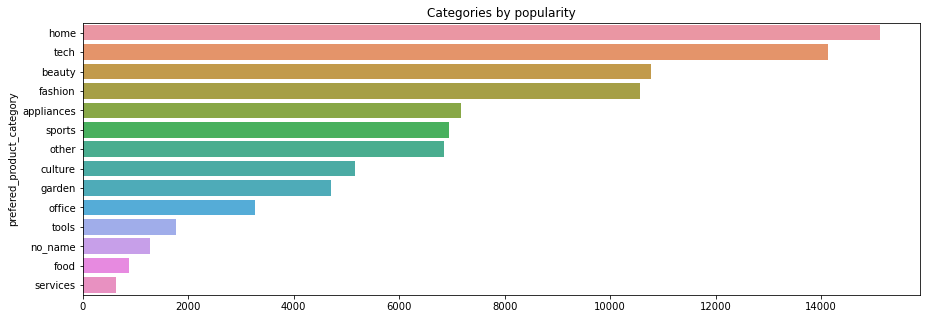

In [120]:
categories = df_client.groupby(['prefered_product_category']).count().sort_values('customer_unique_id', ascending=False)['customer_unique_id']
plt.figure(figsize=(15,5))
plt.title('Categories by popularity')
sns.barplot(x=categories.values, y=categories.index)

<AxesSubplot:title={'center':'Payment methods by popularity'}, ylabel='prefered_payment_type'>

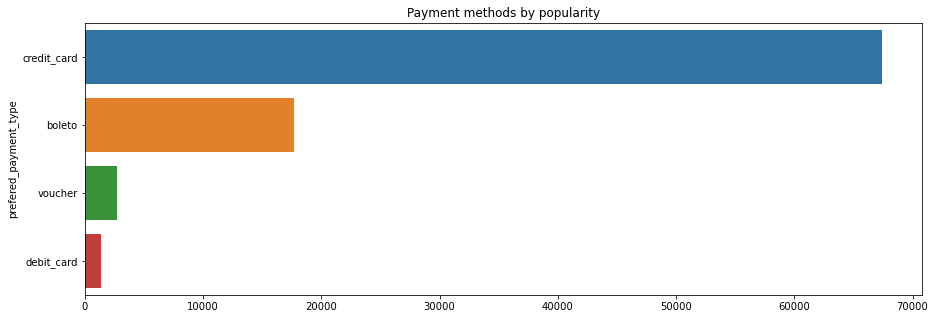

In [121]:
payments = df_client.groupby(['prefered_payment_type']).count().sort_values('customer_unique_id', ascending=False)['customer_unique_id']
plt.figure(figsize=(15,5))
plt.title('Payment methods by popularity')
sns.barplot(x=payments.values, y=payments.index)

<AxesSubplot:title={'center':'Orders by client'}, xlabel='orders_placed'>

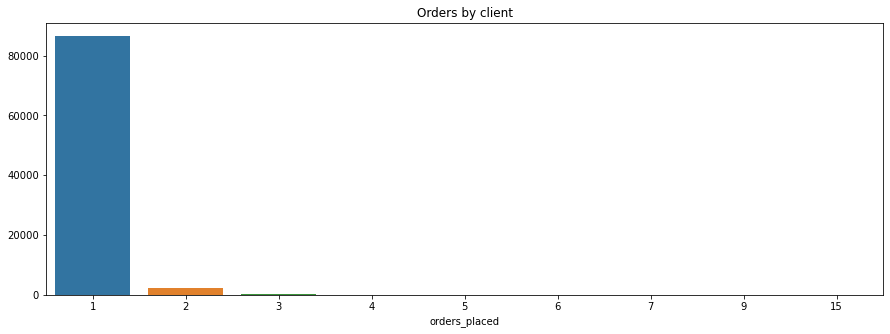

In [122]:
q_orders = df_client.groupby(['orders_placed']).count()['customer_unique_id']
plt.figure(figsize=(15,5))
plt.title('Orders by client')
sns.barplot(x=q_orders.index, y=q_orders.values)

La plupart des clients ont fait une seule commande et ont un comportement assez similaire.

## Corrélations

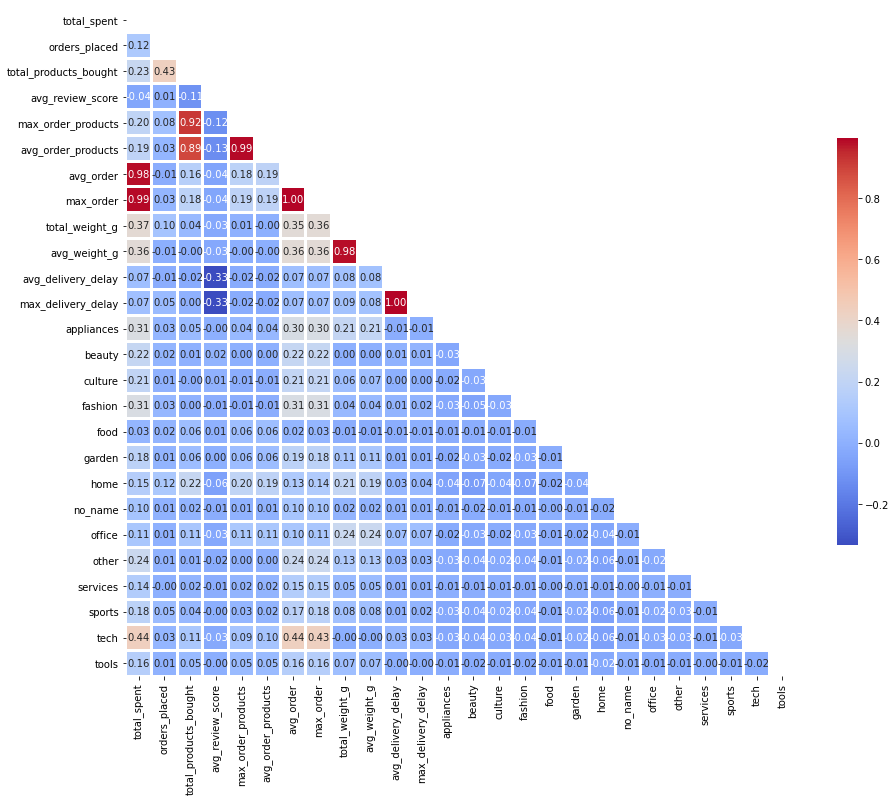

In [123]:
corrMatrix = df_client.drop(['first_order_date', 'last_order_date'], axis=1).corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            linewidths=2,
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .5},
           )
plt.show()

Le coefficient R de Pearson peut être interprété (en valeurs absolues) comme suit :

| Rang | Correlation |
| --- | --- |
| 1~0.9 | corrélation très élevée |
| 0.9~0.7 | corrélation élevée |
| 0.7~0.5 | corrélation modérée |
| 0.5~0.3 | faible corrélation |
| 0.3~0 | corrélation négligeable |

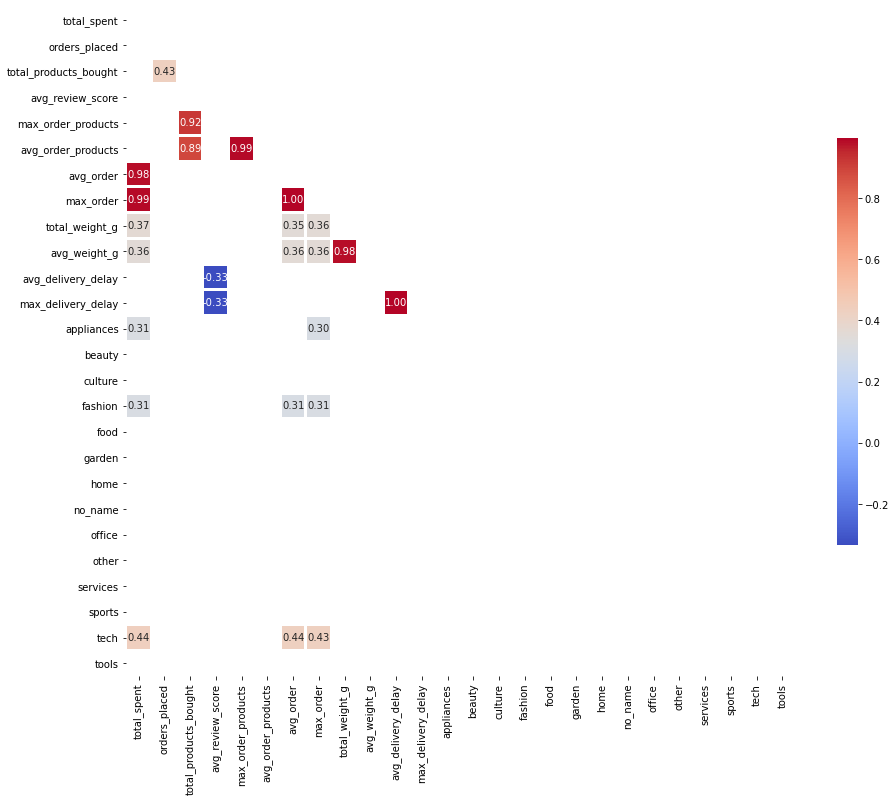

In [124]:
relevant_features = corrMatrix[abs(corrMatrix)>0.3]

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(relevant_features,
            mask=mask,
            annot=True,
            fmt='.2f',
            linewidths=2,
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .5},
           )
plt.show()

# Export

Le dataframe finale contient des colonnes RFM

In [125]:
from datetime import timedelta

df_rfm = df_client_wo.copy()

snapshot_date = df_rfm['last_order_date'].max()+timedelta(days=1)
df_rfm['recency'] = df_rfm['last_order_date'].apply(lambda x: (snapshot_date - x).days)

<AxesSubplot:xlabel='total_spent', ylabel='Density'>

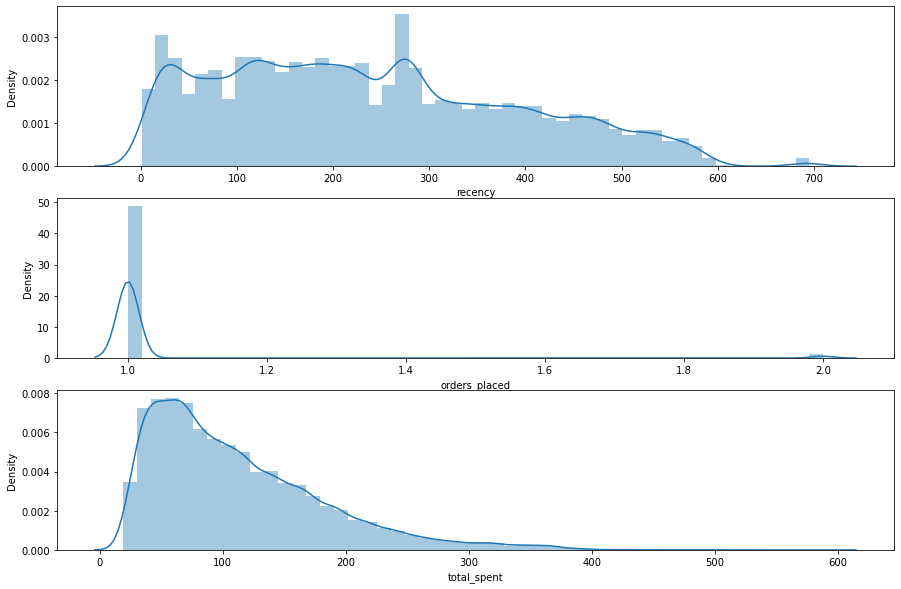

In [126]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1);sns.distplot(df_rfm['recency'])
plt.subplot(3,1,2);sns.distplot(df_rfm['orders_placed'])
plt.subplot(3,1,3);sns.distplot(df_rfm['total_spent'])

In [127]:
#create labels for recency, frequency and monetary value
r_labels = range(4, 0, -1)

r_groups = pd.qcut(df_rfm['recency'], q=4, labels=r_labels)

df_rfm = df_rfm.assign(R=r_groups.values)

In [128]:
f_labels = range(1, 5)

f_groups = pd.qcut(df_rfm['orders_placed'].rank(method='first'), q=4, labels=f_labels)

df_rfm = df_rfm.assign(F=f_groups.values)

In [129]:
m_labels = range(1, 5)

m_groups = pd.qcut(df_rfm['total_spent'], q=4, labels=m_labels)

df_rfm = df_rfm.assign(M=m_groups.values)

In [130]:
df_rfm['RFM_segment'] = df_rfm.apply(lambda x: (str(x['R'])+str(x['F'])+str(x['M'])),axis=1)
df_rfm['RFM_score'] = df_rfm.apply(lambda x: (x[['R','F','M']].sum()), axis=1)

In [131]:
df_rfm.to_csv('df_rfm.csv',sep='\t',encoding='utf-8',index=False)